<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#heatmap" data-toc-modified-id="heatmap-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><em>heatmap</em></a></span></li><li><span><a href="#clustermap" data-toc-modified-id="clustermap-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><em>clustermap</em></a></span></li></ul></div>

https://seaborn.pydata.org/#

In [1]:
import numpy as np               
import pandas as pd              
import seaborn as sns            
import os
import warnings

os.chdir(r"C:\SimplonIA\donnees\demos")

%pylab inline

plt.style.use('seaborn-darkgrid')
sns.set(font_scale=2)
warnings.filterwarnings(action="ignore")

Populating the interactive namespace from numpy and matplotlib


In [2]:
house = pd.read_csv('housing.csv')
house.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [3]:
house.corr()

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.320451   -0.296244   -0.302916      -0.119034   
total_rooms               0.930380    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907222       0.004834   
households                0.979728    0.907222    1.000000       0.013033   
median_income            -0.007723    0.004834    0.013033       1.000000   
median_house_value        0.049686   -0.024650    0.065843       0.688075   

                    median_house_value  
longitude                    -0.045967  
latitude                     -0.144160  
housing_median_age            0.105623  
total_rooms                   0.134153  
total_bedrooms                0.049686  
population                   -0.024650  
households                    0.065843  
median_income                 0.688075  
median_house_value            1.000000

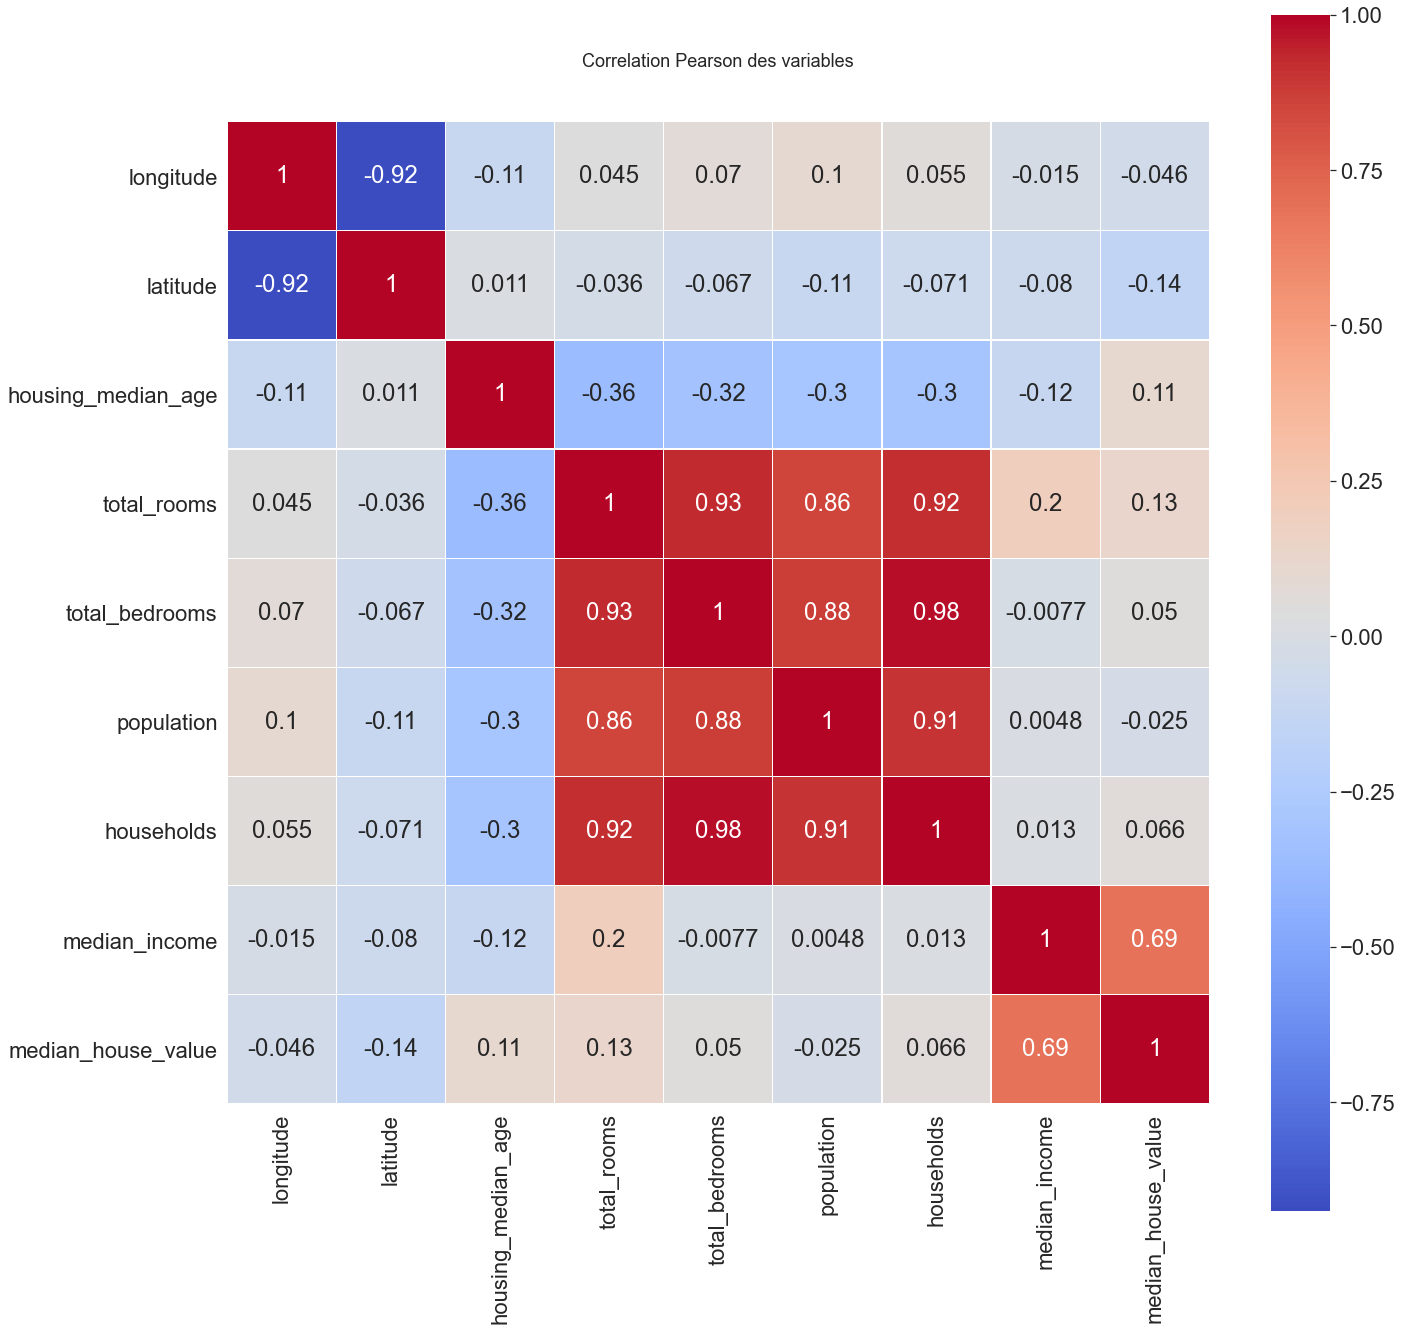

In [4]:
plt.figure(figsize=(22,22))
plt.title('Correlation Pearson des variables', y=1.05, size=18)
sns.heatmap(house.corr(),linewidths=0.3,vmax=1.0, 
            square=True, cmap='coolwarm', linecolor='white', annot=True)

In [5]:
house.shape

(20640, 10)

In [6]:
pd.crosstab(house.ocean_proximity,1)

col_0               1
ocean_proximity      
<1H OCEAN        9136
INLAND           6551
ISLAND              5
NEAR BAY         2290
NEAR OCEAN       2658

In [7]:
house.total_bedrooms[np.isnan(house['total_bedrooms'])] =  0
print(house['total_bedrooms'].shape)    
np.isnan( house['total_bedrooms']).sum()

(20640,)


0

In [8]:
glass = pd.read_csv('glass.csv')
glass = glass.iloc[:,1:]
glass.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

In [9]:
titanic = pd.read_csv('titanic.format.csv')
titanic.head()

Title  Sex  Age  TailleFamille  Pont  Classe  Cabine  Port  Fare  Survived  \
0      0    0    1              2     0       3       0     3     0         0   
1      1    1    2              2     3       1       1     1     3         1   
2      2    1    1              1     0       3       0     3     1         1   
3      1    1    2              2     3       1       1     3     3         1   
4      0    0    2              1     0       3       0     3     1         0   

  lTitle   lSex lPont lPort  
0     Mr  Homme   Pas     S  
1    Mrs  Femme     C     C  
2   Miss  Femme   Pas     S  
3    Mrs  Femme     C     S  
4     Mr  Homme   Pas     S

In [10]:
mushrooms = pd.read_csv('mushroomsD.csv')
mushrooms.head()

class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-above-ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4             1          0           4  ...                         2   

   stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  \
0                         2                       7                       7   
1                         2                       7                       7   
2                         2                       7                       7   
3                         2                       7                       7   
4                         2                       7                       7   

   veil-color  ring-number  ring-type  spore-print-color  population  habitat  
0           2            1          4                  2           3        5  
1           2            1          4                  3           2        1  
2           2            1          4                  3           2        3  
3           2            1          4                  2           3        5  
4           2            1          0                  3           0        1  

[5 rows x 22 columns]

In [11]:
breastCancer = pd.read_csv('breastCancer.csv')
breastCancer = breastCancer.iloc[:,2:]
breastCancer.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave.points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave.points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [12]:
housePrice = pd.read_csv('House Prices.csv')
housePrice = housePrice.iloc[:,1:]
housePrice.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [13]:
temperatures=pd.read_csv('temperatures.csv')
temperatures.head()

Ville  Janv  Févr  Mars   Avri    Mai   Juin   Juil   Août  \
0        Abbeville  4.27  4.96  7.27   9.94  13.17  15.89  17.73  17.95   
1            Lille  3.80  4.73  7.40  10.55  14.09  16.95  18.77  18.74   
2  Pte De La Hague  7.89  7.66  8.54  10.03  12.38  14.79  16.72  17.48   
3             Caen  5.38  5.94  7.80  10.02  13.21  16.19  17.94  18.18   
4            Rouen  3.95  4.66  7.28   9.99  13.38  16.38  18.11  18.11   

    Sept   Octo   Nove  Déce        Lat      Long  Alt    Moy    Amp Zone  
0  15.47  11.90   7.80  4.92  50.136000  1.834000   69  10.94  13.68   NO  
1  15.90  11.81   7.53  4.52  50.570000  3.097500   47  11.23  14.97   NE  
2  16.63  14.38  11.31  8.96  49.725167 -1.939833    6  12.23   9.82   NO  
3  15.85  12.59   8.75  5.96  49.180000 -0.456167   67  11.48  12.80   NO  
4  15.33  11.60   7.40  4.46  49.383000  1.181667  151  10.89  14.16   NO

# *heatmap*

In [14]:
tc = glass.corr()
tc

RI        Na        Mg        Al        Si         K        Ca  \
RI    1.000000 -0.191885 -0.122274 -0.407326 -0.542052 -0.289833  0.810403   
Na   -0.191885  1.000000 -0.273732  0.156794 -0.069809 -0.266087 -0.275442   
Mg   -0.122274 -0.273732  1.000000 -0.481799 -0.165927  0.005396 -0.443750   
Al   -0.407326  0.156794 -0.481799  1.000000 -0.005524  0.325958 -0.259592   
Si   -0.542052 -0.069809 -0.165927 -0.005524  1.000000 -0.193331 -0.208732   
K    -0.289833 -0.266087  0.005396  0.325958 -0.193331  1.000000 -0.317836   
Ca    0.810403 -0.275442 -0.443750 -0.259592 -0.208732 -0.317836  1.000000   
Ba   -0.000386  0.326603 -0.492262  0.479404 -0.102151 -0.042618 -0.112841   
Fe    0.143010 -0.241346  0.083060 -0.074402 -0.094201 -0.007719  0.124968   
Type -0.164237  0.502898 -0.744993  0.598829  0.151565 -0.010054  0.000952   

            Ba        Fe      Type  
RI   -0.000386  0.143010 -0.164237  
Na    0.326603 -0.241346  0.502898  
Mg   -0.492262  0.083060 -0.744993  
Al    0.479404 -0.074402  0.598829  
Si   -0.102151 -0.094201  0.151565  
K    -0.042618 -0.007719 -0.010054  
Ca   -0.112841  0.124968  0.000952  
Ba    1.000000 -0.058692  0.575161  
Fe   -0.058692  1.000000 -0.188278  
Type  0.575161 -0.188278  1.000000

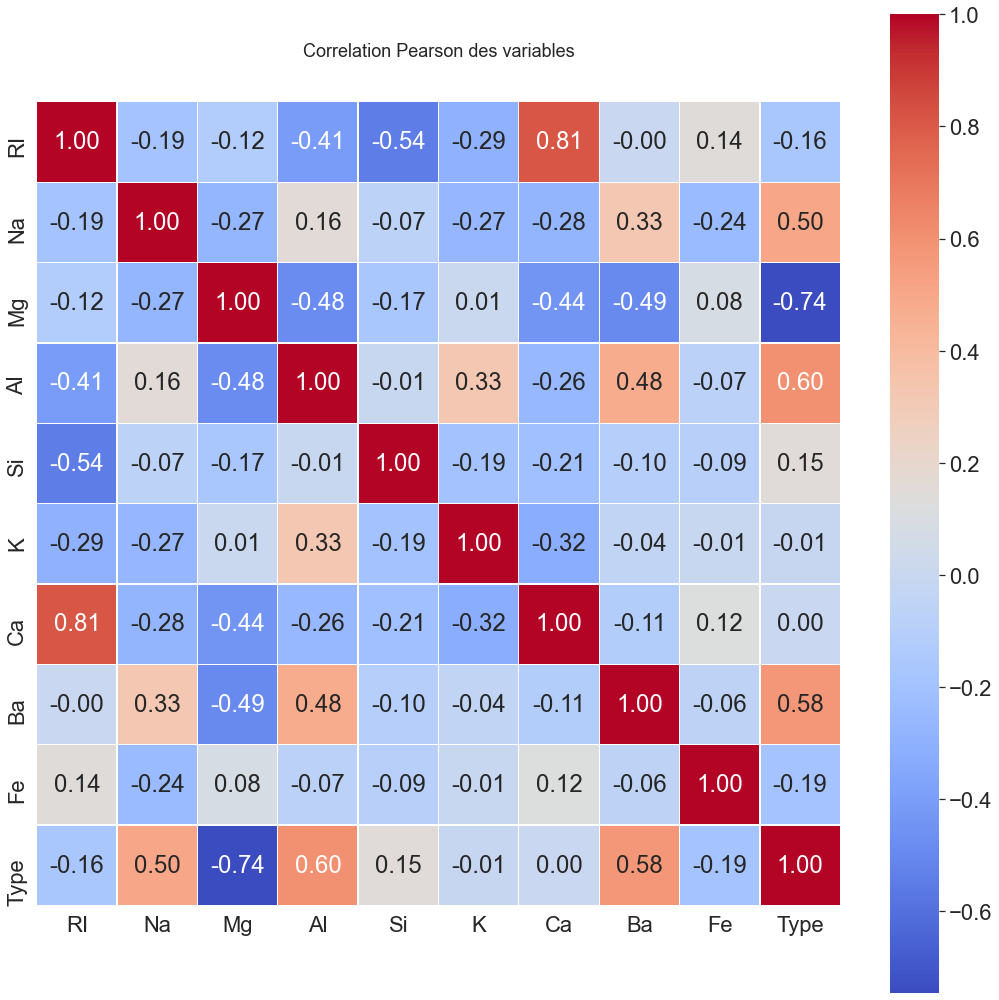

In [15]:
plt.figure(figsize=(18,18))
plt.title('Correlation Pearson des variables', y=1.05, size=18)
sns.heatmap(tc,linewidths=0.3,vmax=1.0,fmt= '.2f',
            square=True, cmap='coolwarm', linecolor='white', annot=True);

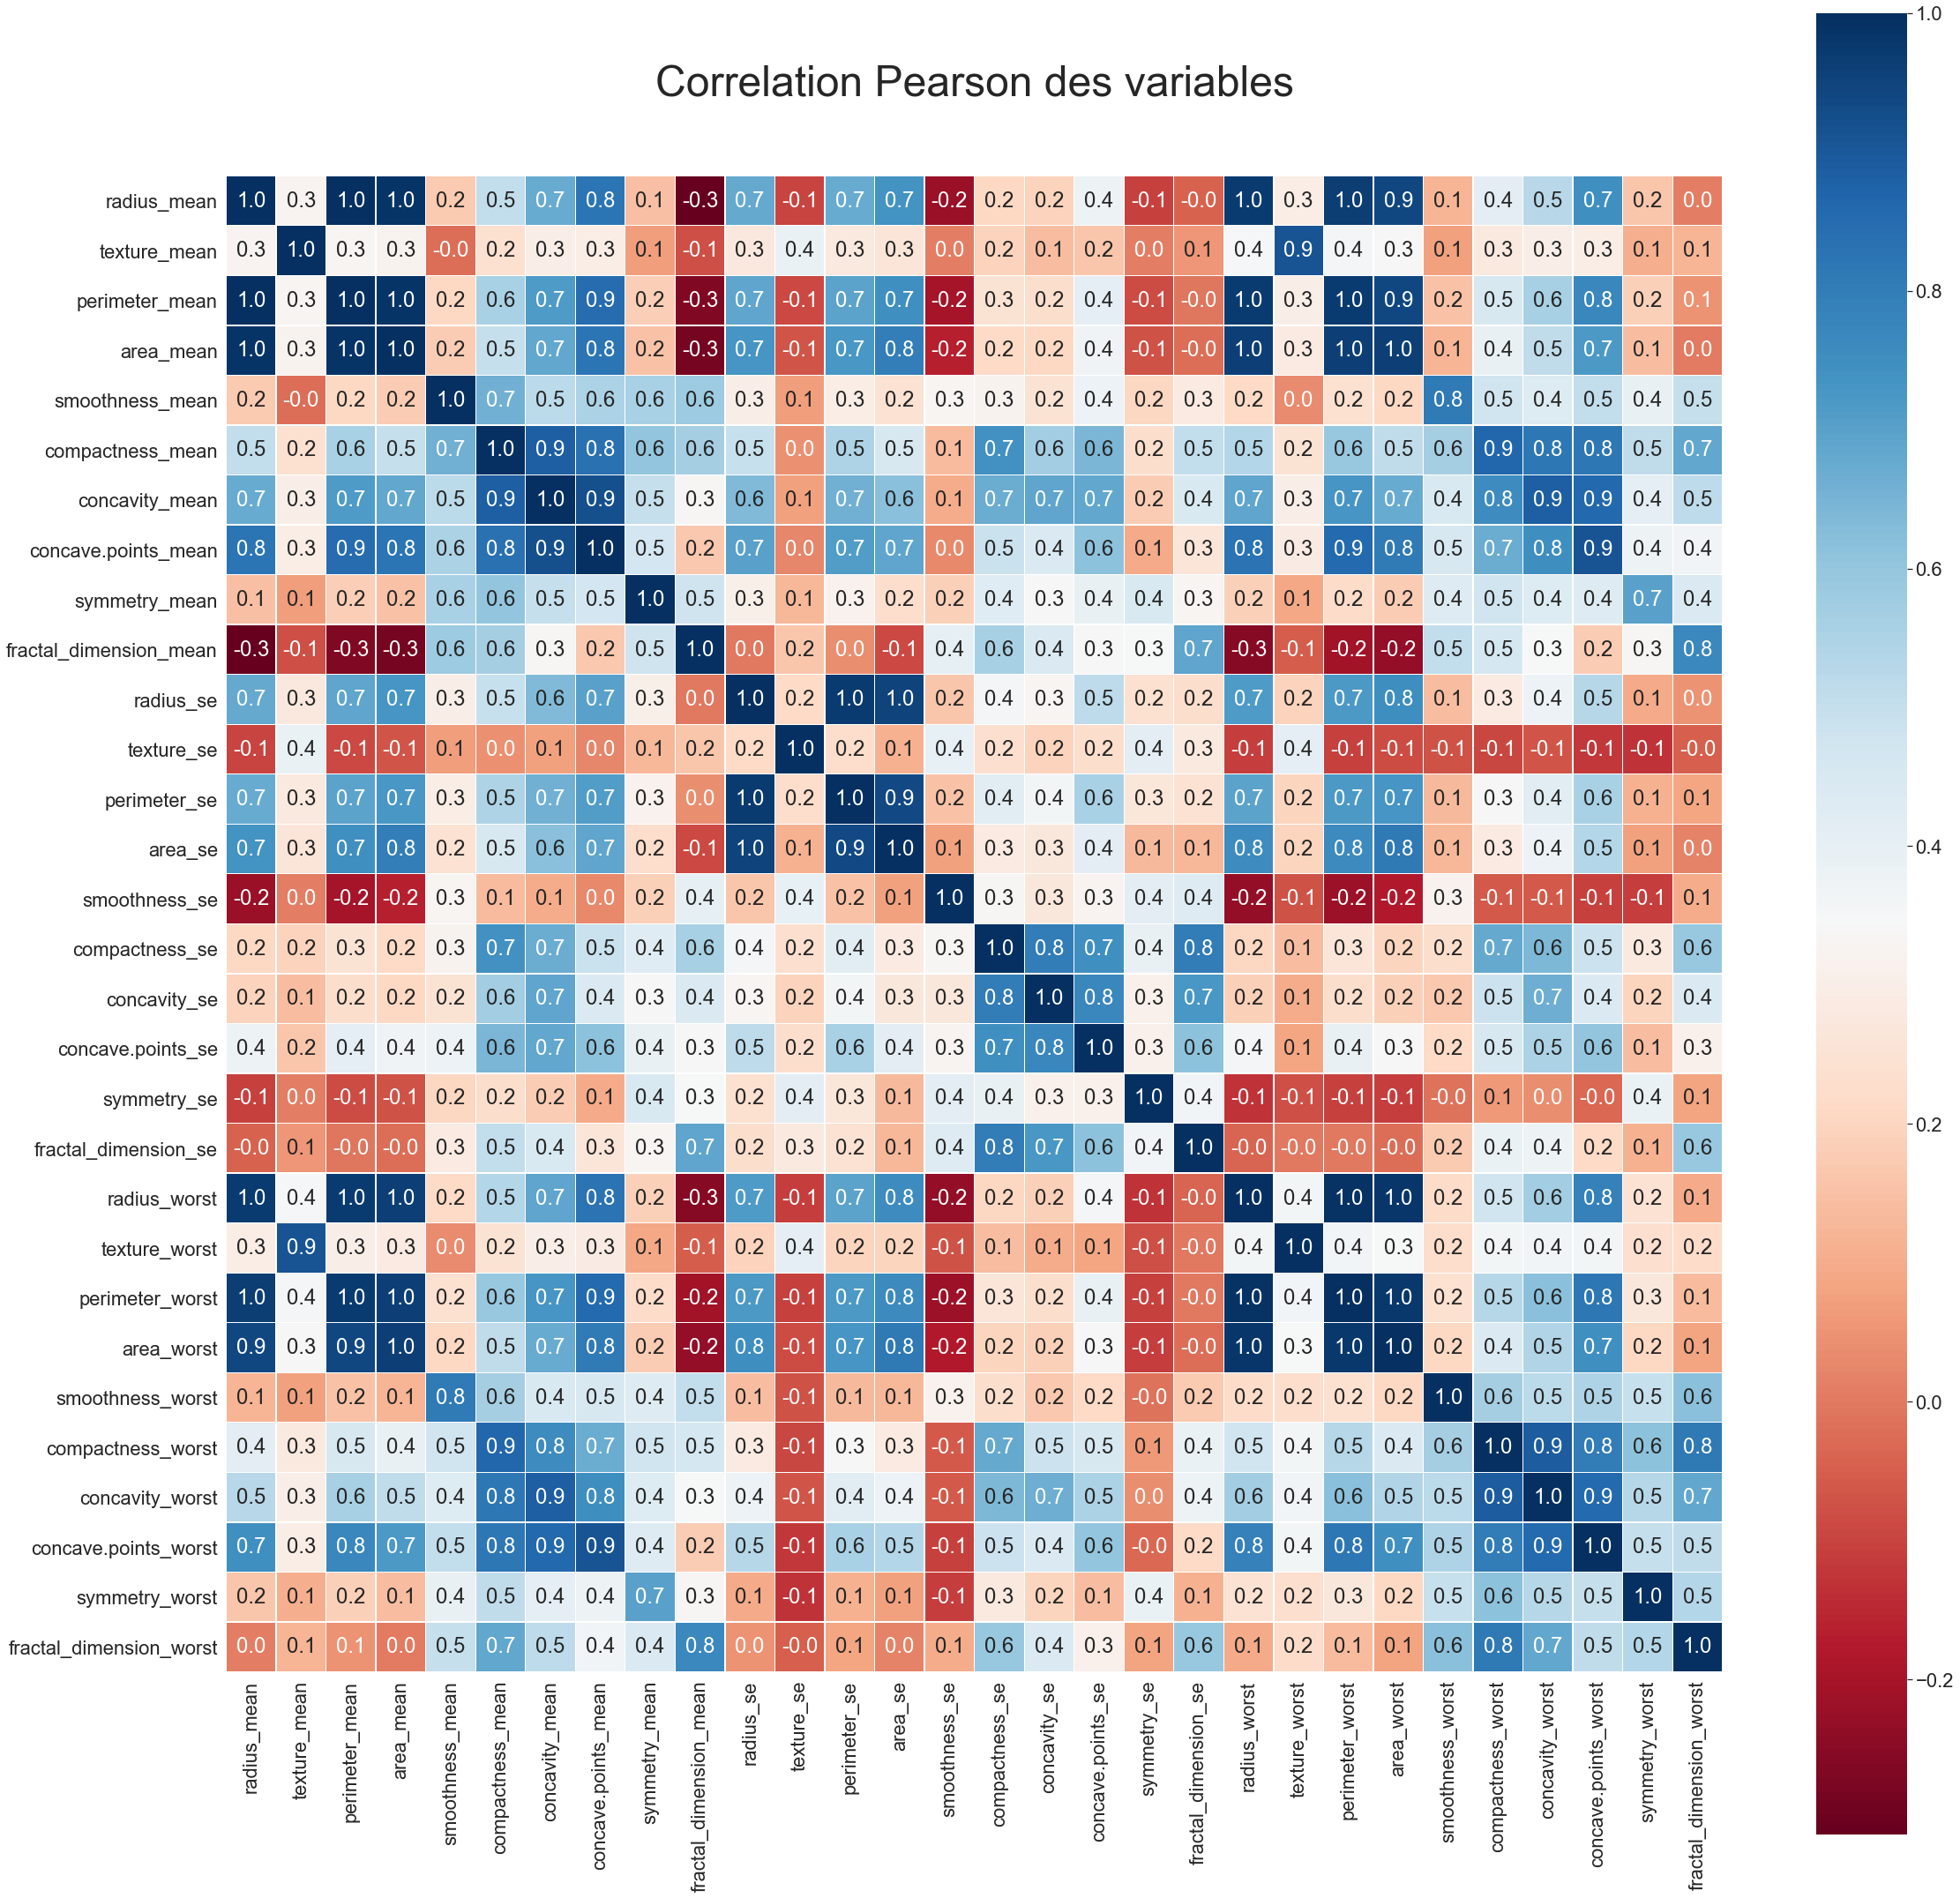

In [16]:
colormap = plt.cm.RdBu
plt.figure(figsize=(38,38))
plt.title('Correlation Pearson des variables', y=1.05, size=48)
sns.heatmap(breastCancer.iloc[:,1:].astype(float).corr(),linewidths=0.3,vmax=1.0,fmt= '.1f', 
            square=True, cmap=colormap, linecolor='white', annot=True);

In [17]:
housePrice.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [18]:
fp = housePrice.pivot_table(index='MoSold',columns='YrSold',values='SalePrice')

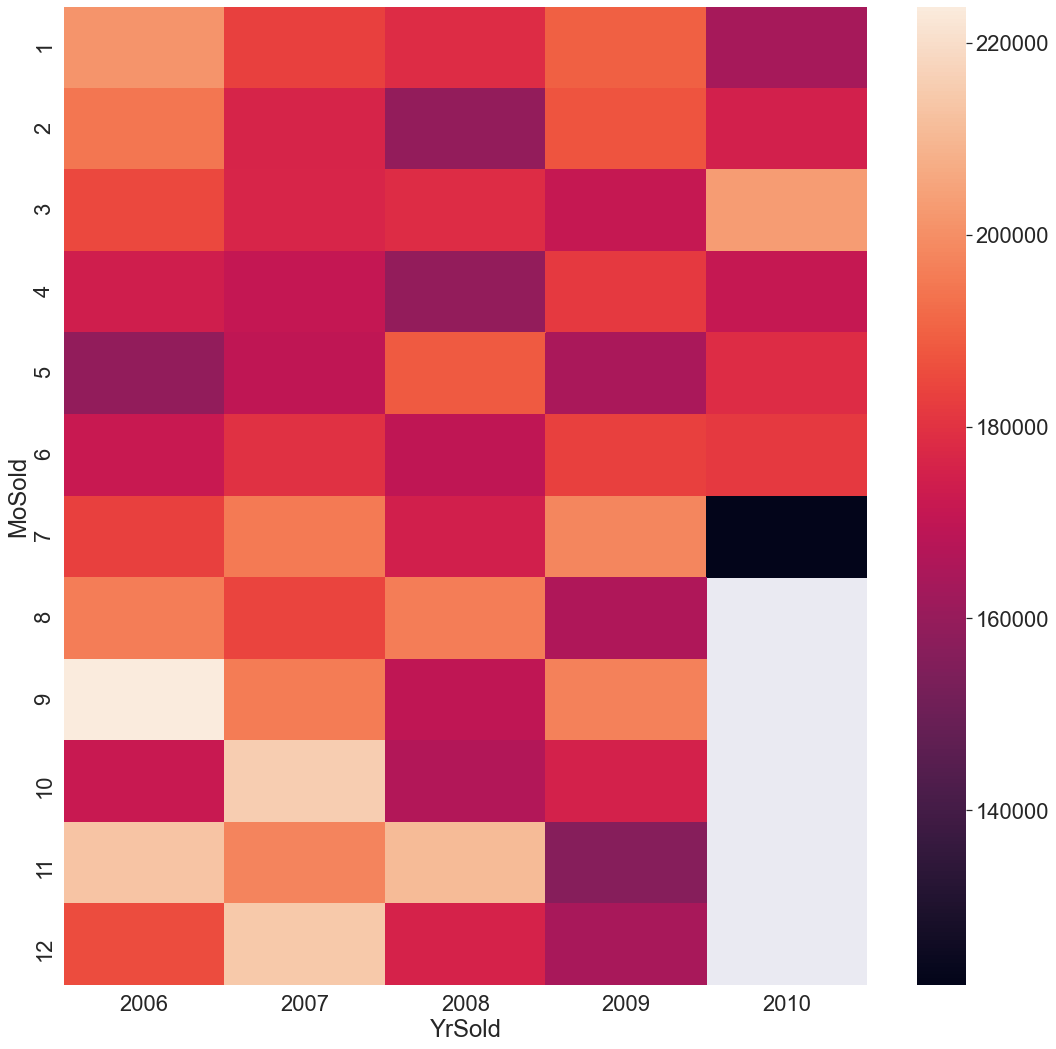

In [19]:
plt.figure(figsize=(18,18))
sns.heatmap(fp);

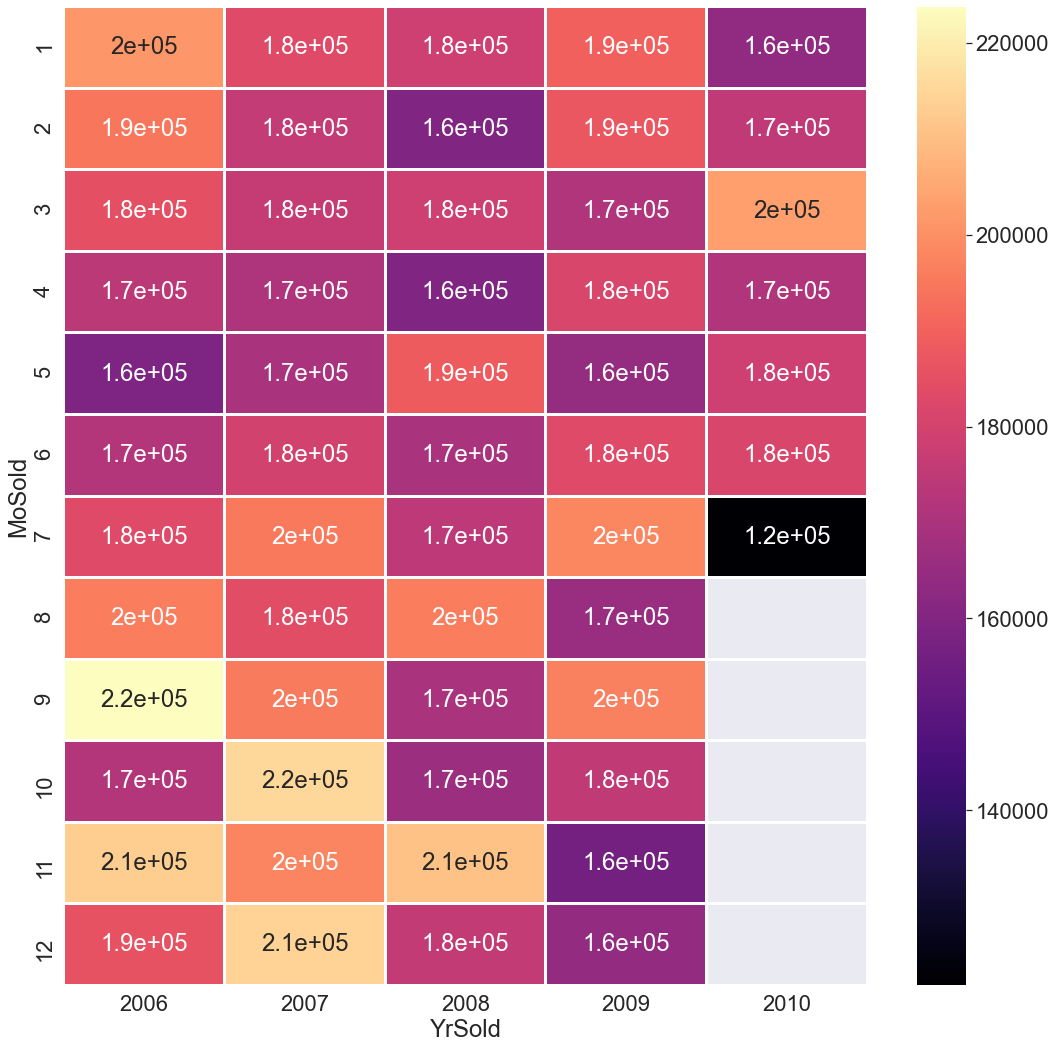

In [20]:
plt.figure(figsize=(18,18))
sns.heatmap(fp,cmap='magma',linewidths=2,linecolor='white',annot=True);

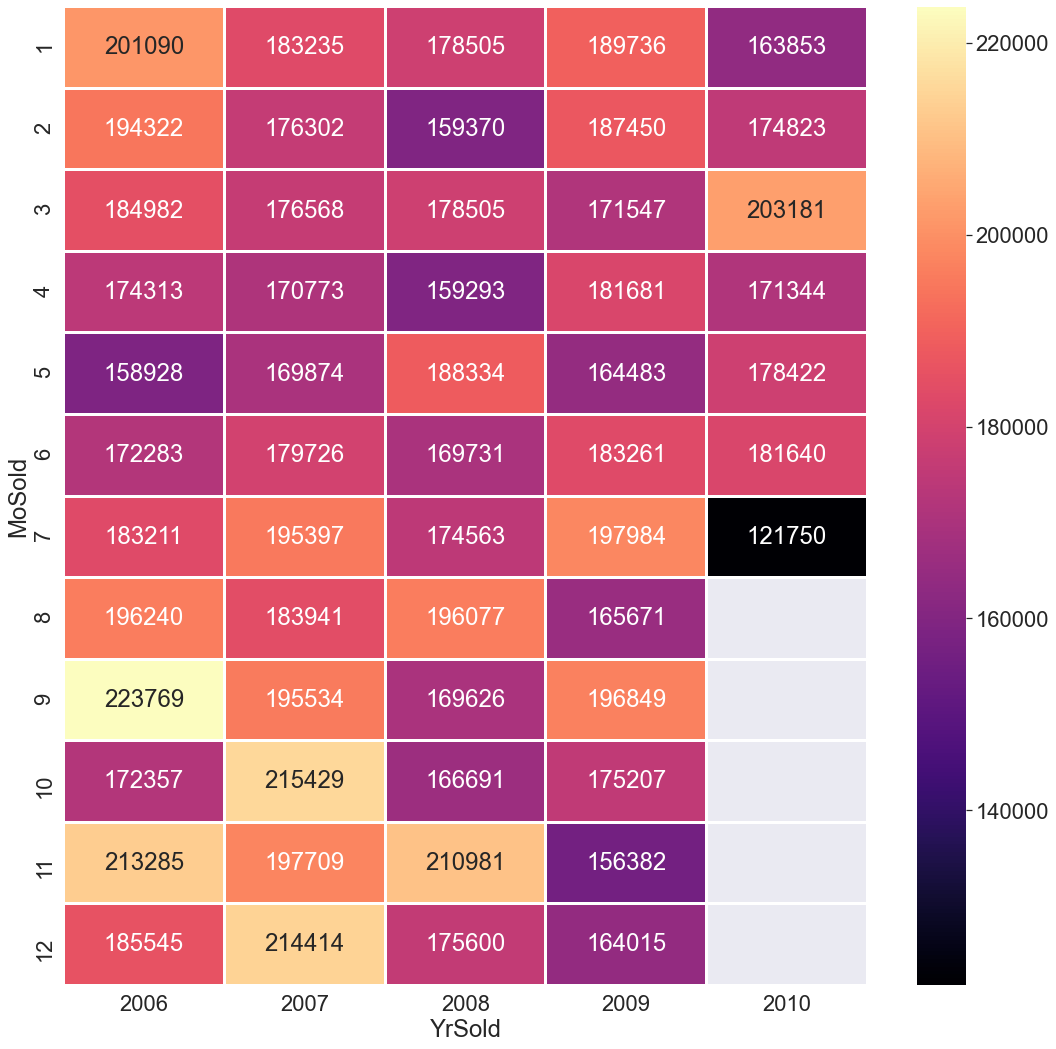

In [21]:
plt.figure(figsize=(18,18))
sns.heatmap(fp,cmap='magma',linewidths=2,linecolor='white',fmt= '.0f', annot=True);

In [22]:
temp = temperatures.iloc[:,1:13]
temp.index = temperatures.iloc[:,0]
temp.head()

Janv  Févr  Mars   Avri    Mai   Juin   Juil   Août   Sept  \
Ville                                                                         
Abbeville        4.27  4.96  7.27   9.94  13.17  15.89  17.73  17.95  15.47   
Lille            3.80  4.73  7.40  10.55  14.09  16.95  18.77  18.74  15.90   
Pte De La Hague  7.89  7.66  8.54  10.03  12.38  14.79  16.72  17.48  16.63   
Caen             5.38  5.94  7.80  10.02  13.21  16.19  17.94  18.18  15.85   
Rouen            3.95  4.66  7.28   9.99  13.38  16.38  18.11  18.11  15.33   

                  Octo   Nove  Déce  
Ville                                
Abbeville        11.90   7.80  4.92  
Lille            11.81   7.53  4.52  
Pte De La Hague  14.38  11.31  8.96  
Caen             12.59   8.75  5.96  
Rouen            11.60   7.40  4.46

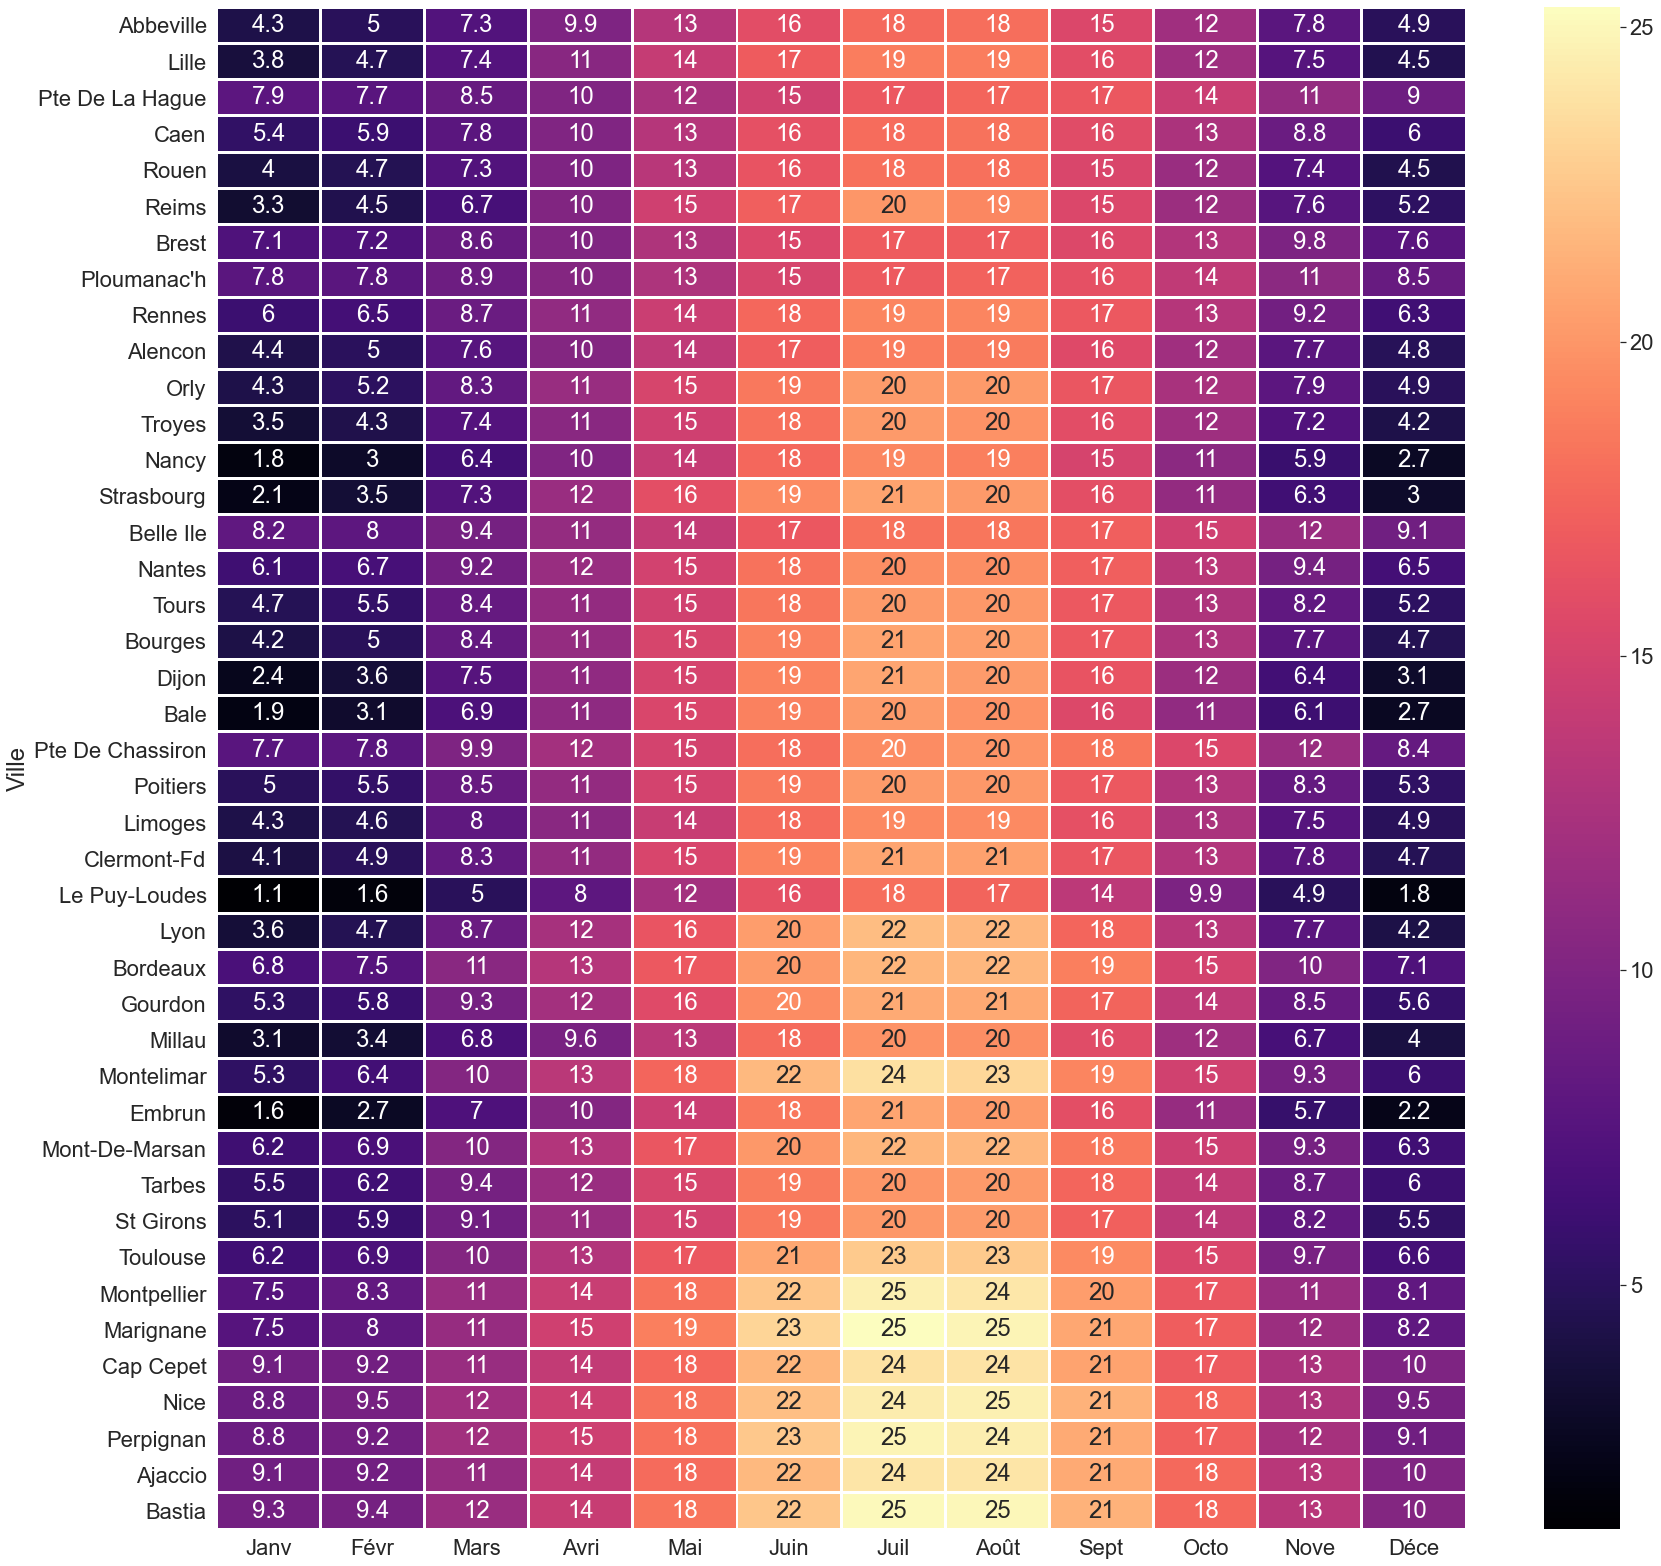

In [23]:
plt.figure(figsize=(28,28))
sns.heatmap(temp,cmap='magma',linewidths=2,linecolor='white', annot=True);

# *clustermap*

In [24]:
meteo = pd.read_csv('meteoCompleteFinal.csv')
meteoAM = meteo[["Année","Mois","Température","Humidité","Pression"]].groupby(["Année","Mois"])
meteoAM.agg(["mean"])
meteo = meteoAM.apply(lambda x: x) 
meteo.head()

Année  Mois  Température  Humidité  Pression
0   1996     1         2.89      99.0     99.09
1   1996     1         2.70      99.0     99.07
2   1996     1         2.89      99.0     99.09
3   1996     1         3.60      99.0     99.11
4   1996     1         4.39      99.0     99.04

In [25]:
tabC = meteo[meteo.Année < 2020].pivot_table(index='Mois',columns='Année',
                                                  values=["Température","Humidité","Pression"])
tabC

Humidité                                                         \
Année       1996       1997       1998       1999       2000       2001   
Mois                                                                      
1      85.746498  85.889498  81.106636  82.233175  82.364702  83.673688   
2      78.711383  79.251041  78.808793  78.708077  79.779061  78.329615   
3      73.471965  72.975667  71.387292  76.288551  73.942874  81.519501   
4      69.882092  62.335641  78.464960  77.237117  76.219947  73.947503   
5      76.027187  71.497326  70.901320  77.295949  76.231235  74.623293   
6      69.151951  76.279206  72.608678  70.591881  70.799610  67.347661   
7      69.149725  73.744265  71.436780  69.669000  72.773555  71.730077   
8      73.019792  74.802260  68.017827  73.949538  72.935340  71.675397   
9      72.807607  73.647041  77.715040  76.581023  75.503067  75.555886   
10     80.771910  77.591944  82.573380  82.011045  82.231538  82.394910   
11     84.334315  85.088581  80.497953  81.962084  83.423077  81.532271   
12     85.431180  84.404404  83.456673  81.360016  83.208226  78.752204   

                                                   ... Température             \
Année       2002       2003       2004       2005  ...        2010       2011   
Mois                                               ...                          
1      81.635697  80.637662  82.742073  80.451190  ...    2.444793   4.899586   
2      78.386920  74.485589  76.810194  75.659194  ...    4.579847   6.685208   
3      73.737253  69.822196  73.825362  74.507848  ...    7.428921   8.941261   
4      69.108938  66.280862  74.880235  75.262552  ...   11.669755  13.927948   
5      74.692574  72.571923  71.596582  71.527046  ...   13.278836  16.304783   
6      72.379979  69.675882  68.129368  68.998011  ...   18.015210  17.807631   
7      72.161652  65.683408  69.220634  69.203759  ...   21.401986  18.377853   
8      76.804422  62.328425  74.212406  68.078552  ...   19.373215  19.960640   
9      75.578947  69.039787  73.521528  76.397468  ...   16.131306  18.416942   
10     80.527913  79.267709  82.327473  80.940931  ...   12.268676  13.837403   
11     85.625577  85.613425  83.589264  81.854196  ...    7.946632  10.736640   
12     85.976443  82.793767  84.681391  81.309427  ...    2.921702   7.789341   

                                                                         \
Année       2012       2013       2014       2015       2016       2017   
Mois                                                                      
1       6.250686   4.705784   7.350947   5.519975   6.829891   3.054383   
2       1.982667   3.674029   7.480112   4.659646   7.061328   7.792016   
3      10.083578   6.694795   9.251176   8.651487   7.608824  10.437894   
4      10.040824  10.495474  12.473727  12.205647  10.590396  11.142695   
5      15.228477  12.173390  14.093829  15.035403  14.437064  15.653710   
6      18.154782  16.838087  18.961877  19.214012  17.836074  20.389095   
7      19.274183  21.851713  19.888825  21.924313  20.602851  20.851044   
8      21.094431  20.181593  18.473140  20.662700  20.847410  20.543241   
9      16.679378  17.207686  18.190614  15.798805  18.831185  15.648574   
10     13.438326  14.788551  15.213272  12.269976  12.126777  14.272705   
11      8.897515   8.016198  10.929441  10.946908   8.707912   8.162144   
12      6.714382   6.307628   6.324781   9.329705   5.681924   5.781423   

                             
Année       2018       2019  
Mois                         
1       8.163247   4.463584  
2       3.358583   7.527014  
3       7.543543   9.707446  
4      13.178785  11.143948  
5      15.494104  13.469138  
6      19.312194  19.385813  
7      22.496724  22.284971  
8      21.444671  21.084510  
9      18.252061  17.807467  
10     13.799981  14.484495  
11      9.223625   8.509075  
12      7.627357   7.915040  

[12 rows x 72 columns]

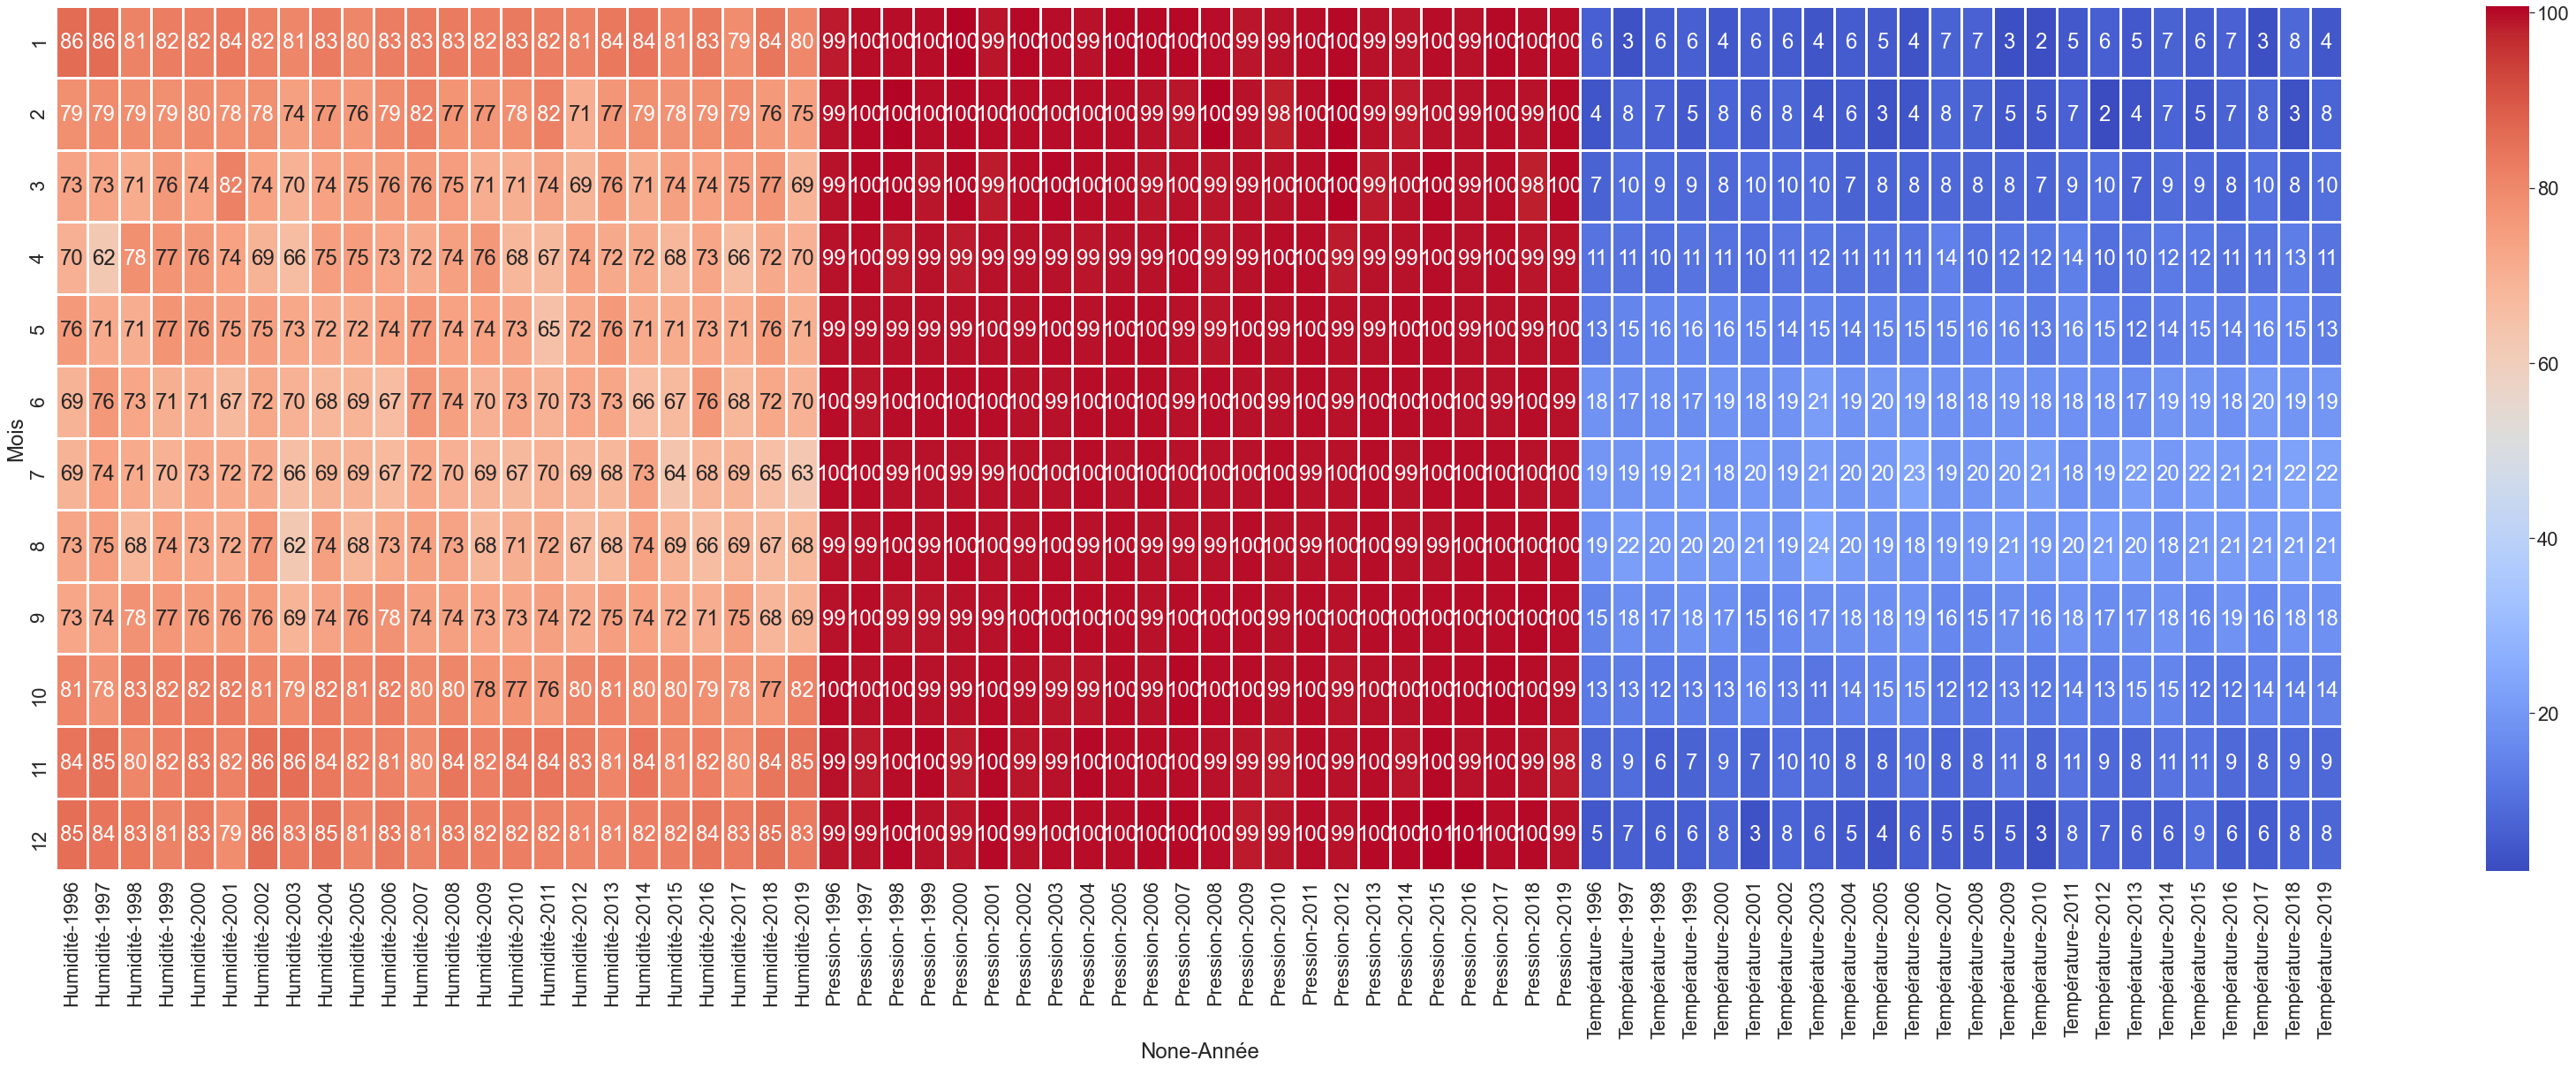

In [26]:
plt.figure(figsize=(58,18))
sns.heatmap(tabC,cmap='coolwarm',linewidths=2,linecolor='white',fmt= '.0f', annot=True);

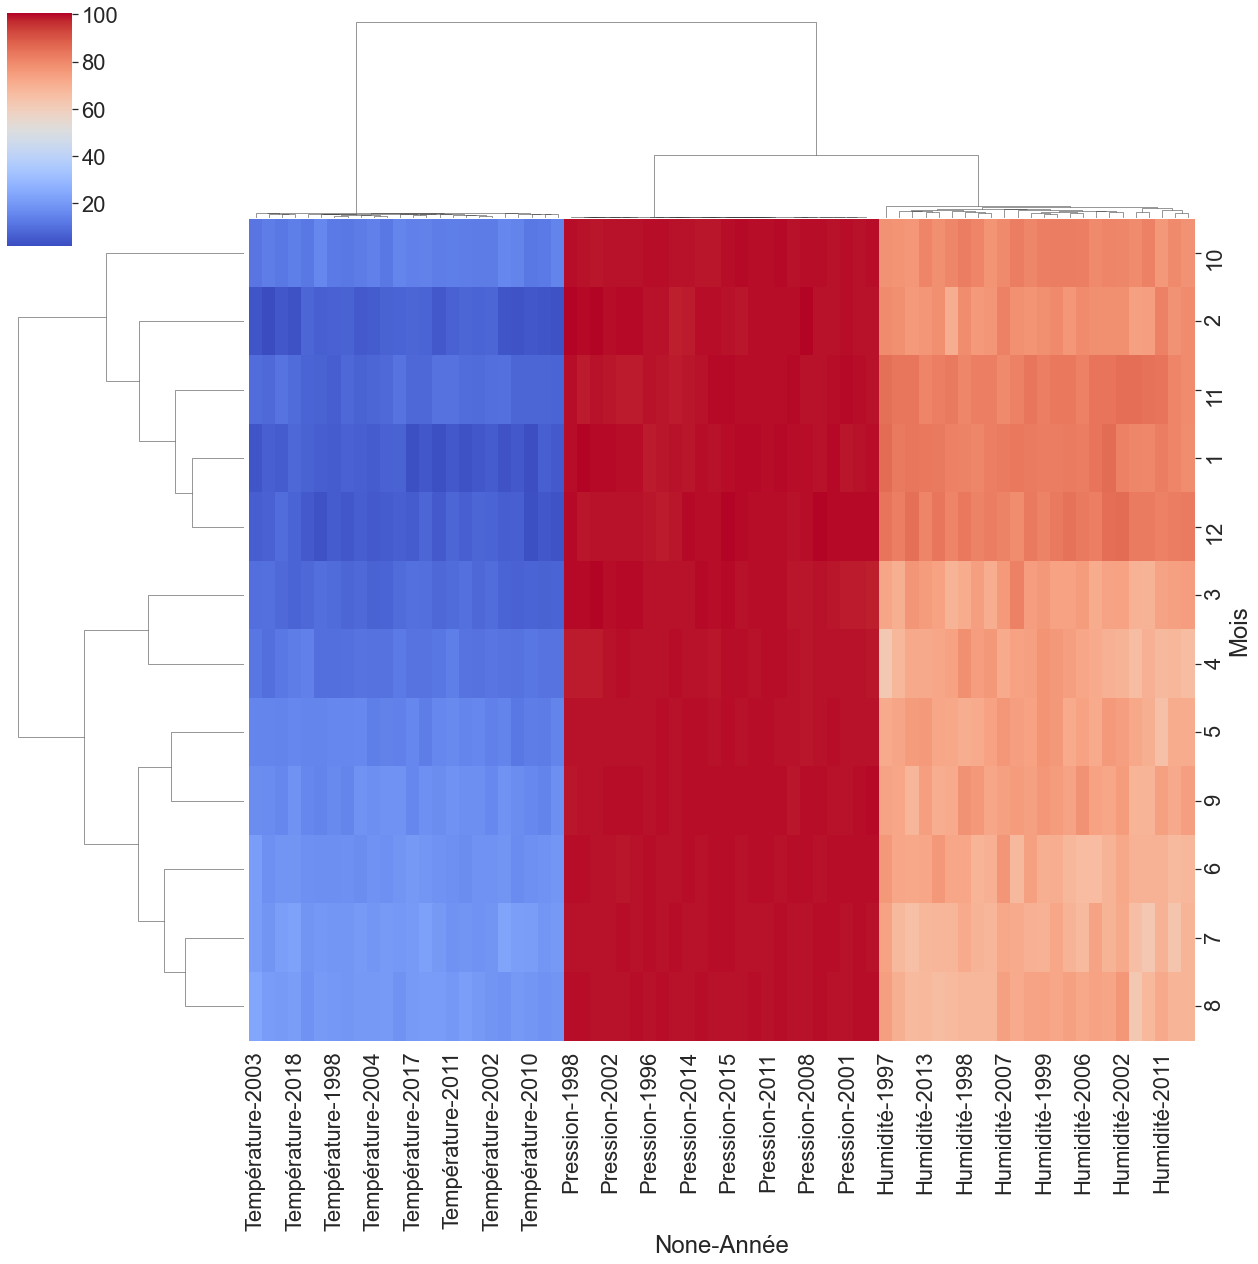

In [27]:
sns.clustermap(tabC.dropna(),cmap='coolwarm',figsize=(18,18));

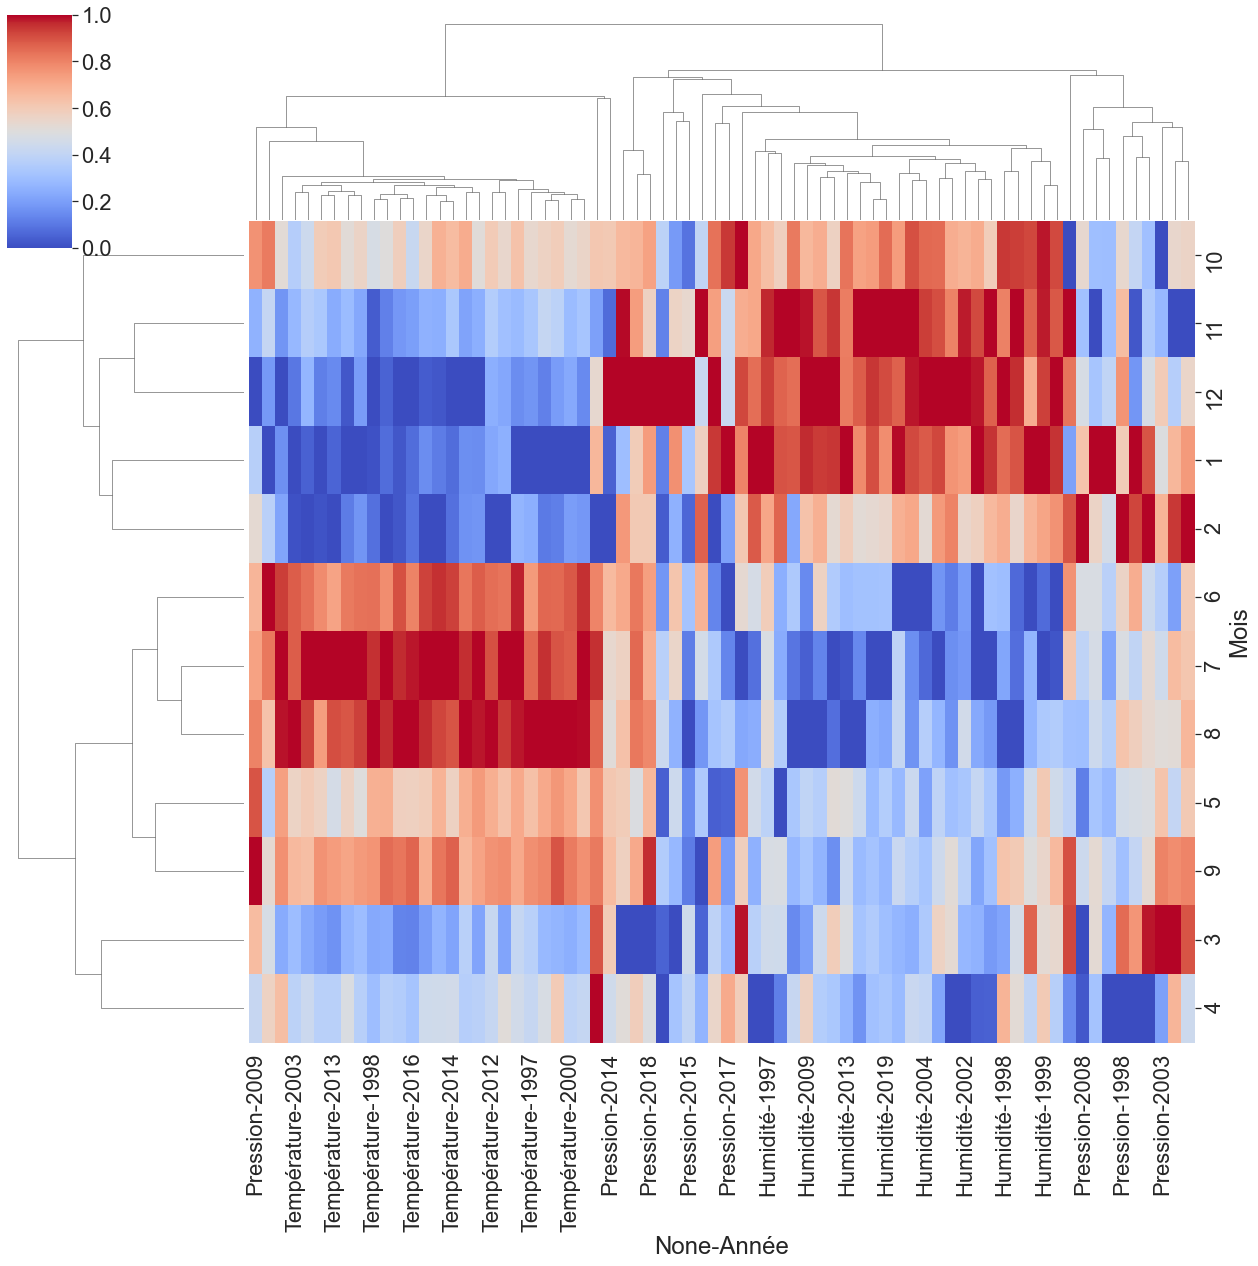

In [28]:
sns.clustermap(tabC,cmap='coolwarm', standard_scale= 1,figsize=(18,18));

In [29]:
tabC = meteo[meteo.Année < 2018].pivot_table(index='Mois',columns='Année',
                                                  values="Température")
tabC

Année       1996       1997       1998       1999       2000       2001  \
Mois                                                                      
1       6.341122   3.262054   5.782760   6.313884   4.395995   6.196583   
2       3.970747   7.878062   6.764912   5.115021   7.539830   6.341864   
3       7.033750  10.202455   8.957219   8.854592   8.317676   9.974015   
4      10.899758  10.999392   9.895595  10.958205  10.666544   9.869121   
5      13.157852  15.107056  15.575370  15.995792  15.715670  15.417831   
6      18.376971  17.092920  17.785368  17.327861  18.509396  17.754857   
7      19.475019  19.147523  19.390779  20.778849  18.371137  19.983945   
8      18.892608  21.756788  20.052256  20.186651  20.277612  20.709919   
9      14.736501  17.631863  16.617639  18.408901  17.419335  14.987776   
10     12.558105  13.237742  12.422876  13.063493  12.812661  15.589262   
11      7.913410   9.399382   6.118738   7.056852   9.031823   7.140376   
12      4.571099   6.507609   5.575389   5.965738   8.085760   3.474165   

Année       2002       2003       2004       2005  ...       2008       2009  \
Mois                                               ...                         
1       5.658235   4.012946   5.620465   5.193146  ...   6.923297   3.114298   
2       8.103915   4.291453   5.635166   3.249983  ...   7.194522   5.026757   
3       9.520978   9.845053   7.221190   7.768130  ...   7.840894   8.166440   
4      11.283722  11.713994  10.574105  11.036915  ...  10.314671  11.695294   
5      13.943243  15.225586  13.900815  14.989804  ...  15.811337  15.800357   
6      18.528120  21.499061  18.747598  19.723050  ...  17.839471  18.530985   
7      19.120870  21.479949  19.622021  20.492641  ...  19.602063  20.248801   
8      19.029774  23.867962  20.198331  19.167105  ...  19.359368  21.041437   
9      16.056069  17.193076  17.637167  17.540146  ...  15.480415  17.398968   
10     13.157471  11.277770  14.001655  15.041209  ...  12.309850  13.280342   
11     10.067993   9.587021   7.990641   7.531873  ...   8.328827  10.566135   
12      7.616649   6.012923   5.260151   3.657048  ...   4.610861   5.299578   

Année       2010       2011       2012       2013       2014       2015  \
Mois                                                                      
1       2.444793   4.899586   6.250686   4.705784   7.350947   5.519975   
2       4.579847   6.685208   1.982667   3.674029   7.480112   4.659646   
3       7.428921   8.941261  10.083578   6.694795   9.251176   8.651487   
4      11.669755  13.927948  10.040824  10.495474  12.473727  12.205647   
5      13.278836  16.304783  15.228477  12.173390  14.093829  15.035403   
6      18.015210  17.807631  18.154782  16.838087  18.961877  19.214012   
7      21.401986  18.377853  19.274183  21.851713  19.888825  21.924313   
8      19.373215  19.960640  21.094431  20.181593  18.473140  20.662700   
9      16.131306  18.416942  16.679378  17.207686  18.190614  15.798805   
10     12.268676  13.837403  13.438326  14.788551  15.213272  12.269976   
11      7.946632  10.736640   8.897515   8.016198  10.929441  10.946908   
12      2.921702   7.789341   6.714382   6.307628   6.324781   9.329705   

Année       2016       2017  
Mois                         
1       6.829891   3.054383  
2       7.061328   7.792016  
3       7.608824  10.437894  
4      10.590396  11.142695  
5      14.437064  15.653710  
6      17.836074  20.389095  
7      20.602851  20.851044  
8      20.847410  20.543241  
9      18.831185  15.648574  
10     12.126777  14.272705  
11      8.707912   8.162144  
12      5.681924   5.781423  

[12 rows x 22 columns]

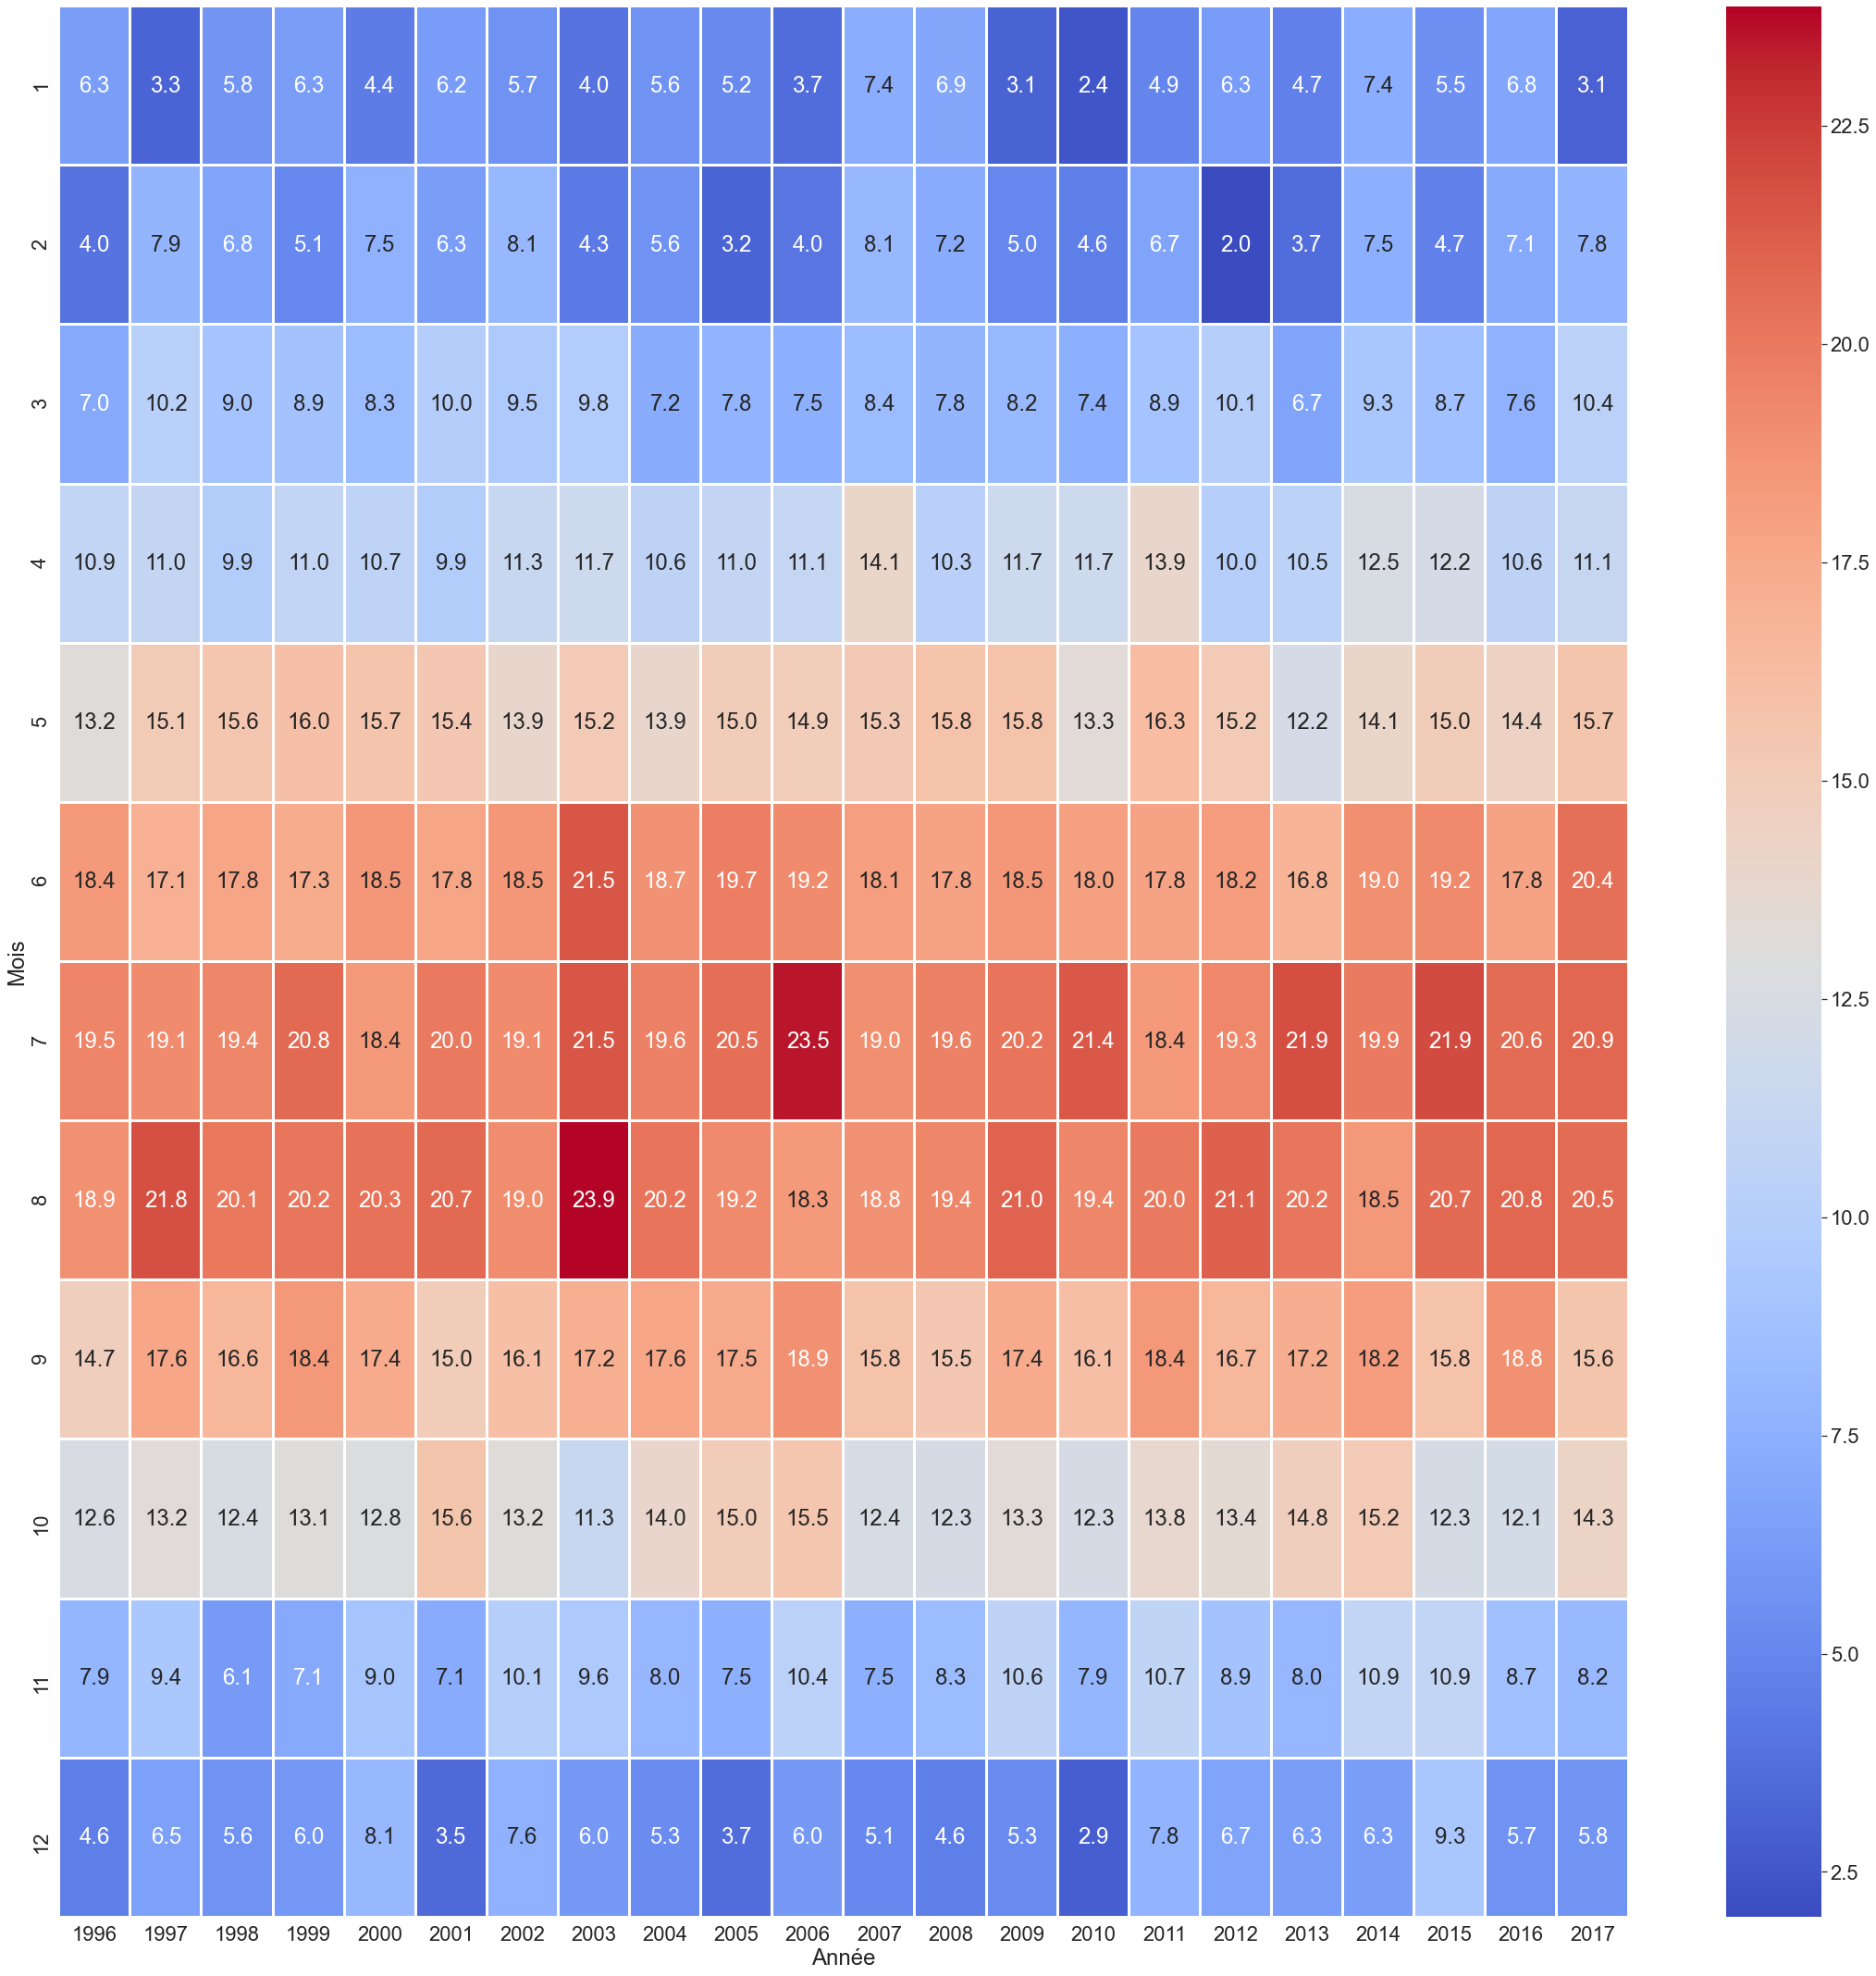

In [30]:
plt.figure(figsize=(38,38))
sns.heatmap(tabC,cmap='coolwarm',linewidths=2,linecolor='white',fmt= '.1f', annot=True);

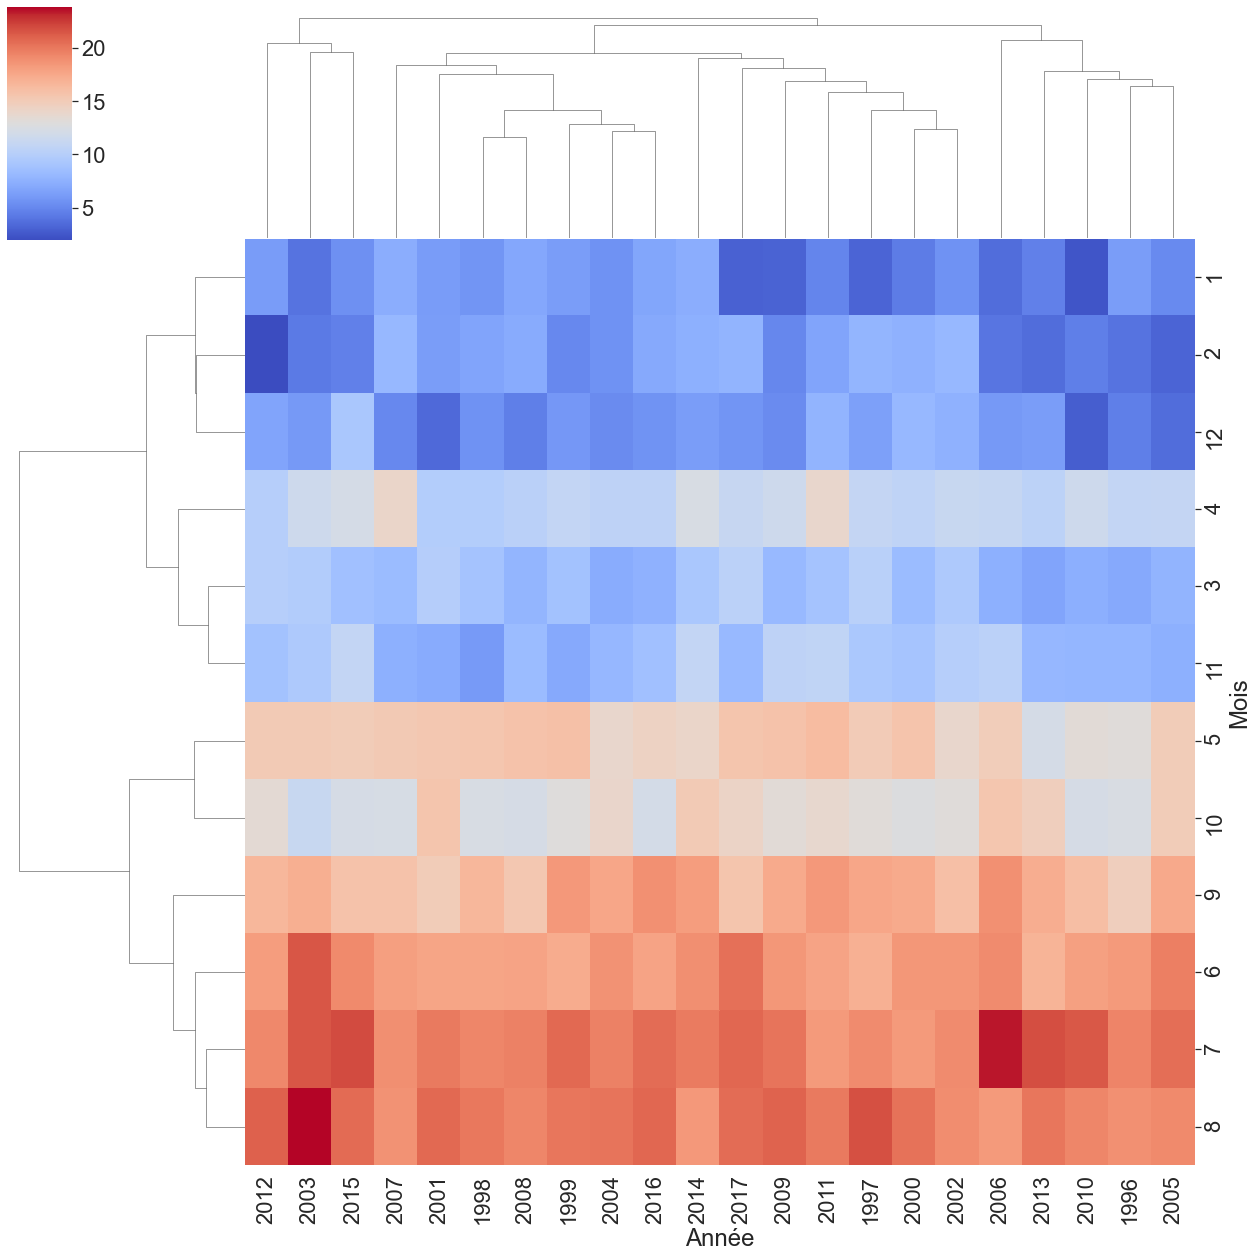

In [31]:
sns.clustermap(tabC,cmap='coolwarm',figsize=(18,18));

In [32]:
meteo = pd.read_csv('meteoCompleteFinal.csv')
meteoAM = meteo[["Ville","Mois","Température"]].groupby(["Ville","Mois"])
meteoAM.agg(["mean"])
meteo = meteoAM.apply(lambda x: x) 
meteo.head()

Ville  Mois  Température
0  Abbeville     1         2.89
1  Abbeville     1         2.70
2  Abbeville     1         2.89
3  Abbeville     1         3.60
4  Abbeville     1         4.39

In [33]:
tabC = meteo.pivot_table(index='Ville',columns='Mois',values="Température")
tabC

Mois                    1         2          3          4          5   \
Ville                                                                   
Abbeville         4.372309  4.945650   7.092692   9.841288  12.854718   
Ajaccio           8.965797  8.983649  10.928321  13.645100  17.267852   
Alencon           4.460286  4.931409   7.306194  10.051220  13.323884   
Bale              2.006641  3.041258   6.548861  10.649915  14.846693   
Bastia            9.135010  9.186098  11.185869  13.839347  17.712316   
Belle Ile         8.252692  8.025690   9.299535  11.197191  13.777965   
Bordeaux          6.822140  7.348053  10.317161  12.917454  16.234133   
Bourges           4.277366  4.900913   8.148068  11.195747  14.757006   
Brest             7.089676  7.083480   8.317183   9.916570  12.483568   
Caen              5.442578  5.844541   7.592919   9.832170  12.801109   
Cap Cepet         9.107509  9.016452  11.298338  13.727985  17.289659   
Clermont-Fd       4.137646  4.849099   8.006348  11.048576  14.775367   
Dijon             2.523281  3.582445   7.201618  10.823901  14.612373   
Embrun            1.419745  2.534277   6.557814   9.990218  13.747292   
Gourdon           5.220965  5.735507   9.004721  11.880580  15.163529   
Le Puy            1.131721  1.498085   4.670948   7.734377  11.528304   
Lille             3.897301  4.684211   7.186551  10.447000  13.777080   
Limoges           4.325551  4.607583   7.810112  10.559168  13.840945   
Lyon              3.726300  4.662335   8.524539  12.229397  16.037394   
Marignane         7.461079  7.825671  11.102441  14.383852  18.394572   
Millau            3.116205  3.450249   6.594085   9.442741  13.023338   
Mont-De-Marsan    6.050486  6.676959   9.833878  12.696449  16.011293   
Montelimar        5.403654  6.211304   9.954062  13.181785  17.040331   
Montpellier       7.463398  8.072597  11.163489  14.011596  17.771350   
Nancy             1.938950  2.969147   6.183932   9.992895  13.736269   
Nantes            6.195581  6.551451   8.933279  11.351499  14.488469   
Nice              8.747897  9.370667  11.709230  14.293320  17.908353   
Orly              4.426658  5.096202   8.033813  11.321130  14.782144   
Perpignan         8.709681  9.068617  11.757367  14.294663  17.707364   
Ploumanac'H       7.893348  7.762259   8.751072  10.272858  12.510450   
Poitiers          5.030346  5.381157   8.267542  11.030215  14.452119   
Pte De Chassiron  7.782520  7.837113   9.922495  12.137275  14.901495   
Pte De La Hague   7.945787  7.632103   8.487212   9.996375  12.225137   
Reims             3.899093  4.388385   6.555600  10.328355  13.539776   
Rennes            5.982084  6.327142   8.453568  10.847654  14.020815   
Rouen             4.048822  4.602751   7.046107   9.889579  12.992241   
St Girons         4.959846  5.752526   8.678546  11.151638  14.351760   
Strasbourg        2.241276  3.437638   7.006332  11.332873  15.544734   
Tarbes            5.363863  6.117581   8.941398  11.305273  14.594663   
Toulouse          6.213435  6.854433   9.969228  12.756003  16.193490   
Tours             4.865625  5.436678   8.238375  11.039326  14.384290   
Troyes            3.592112  4.247868   7.101822  10.430990  14.199477   

Mois                     6          7          8          9          10  \
Ville                                                                     
Abbeville         15.729697  17.570646  17.663879  15.145281  11.868993   
Ajaccio           21.376889  23.642506  23.748851  20.636205  17.437811   
Alencon           16.769450  18.521895  18.306991  15.188487  11.773452   
Bale              18.662577  19.962061  19.476973  15.155130  10.951525   
Bastia            22.003962  24.664408  24.684039  21.038424  17.364209   
Belle Ile         16.567652  18.185019  18.251932  16.870385  14.577304   
Bordeaux          19.818778  21.345586  21.356453  18.476455  14.782295   
Bourges           18.740862  20.473209  20.252422  16.480859  12.537258   
Brest             15.171577  16.73241

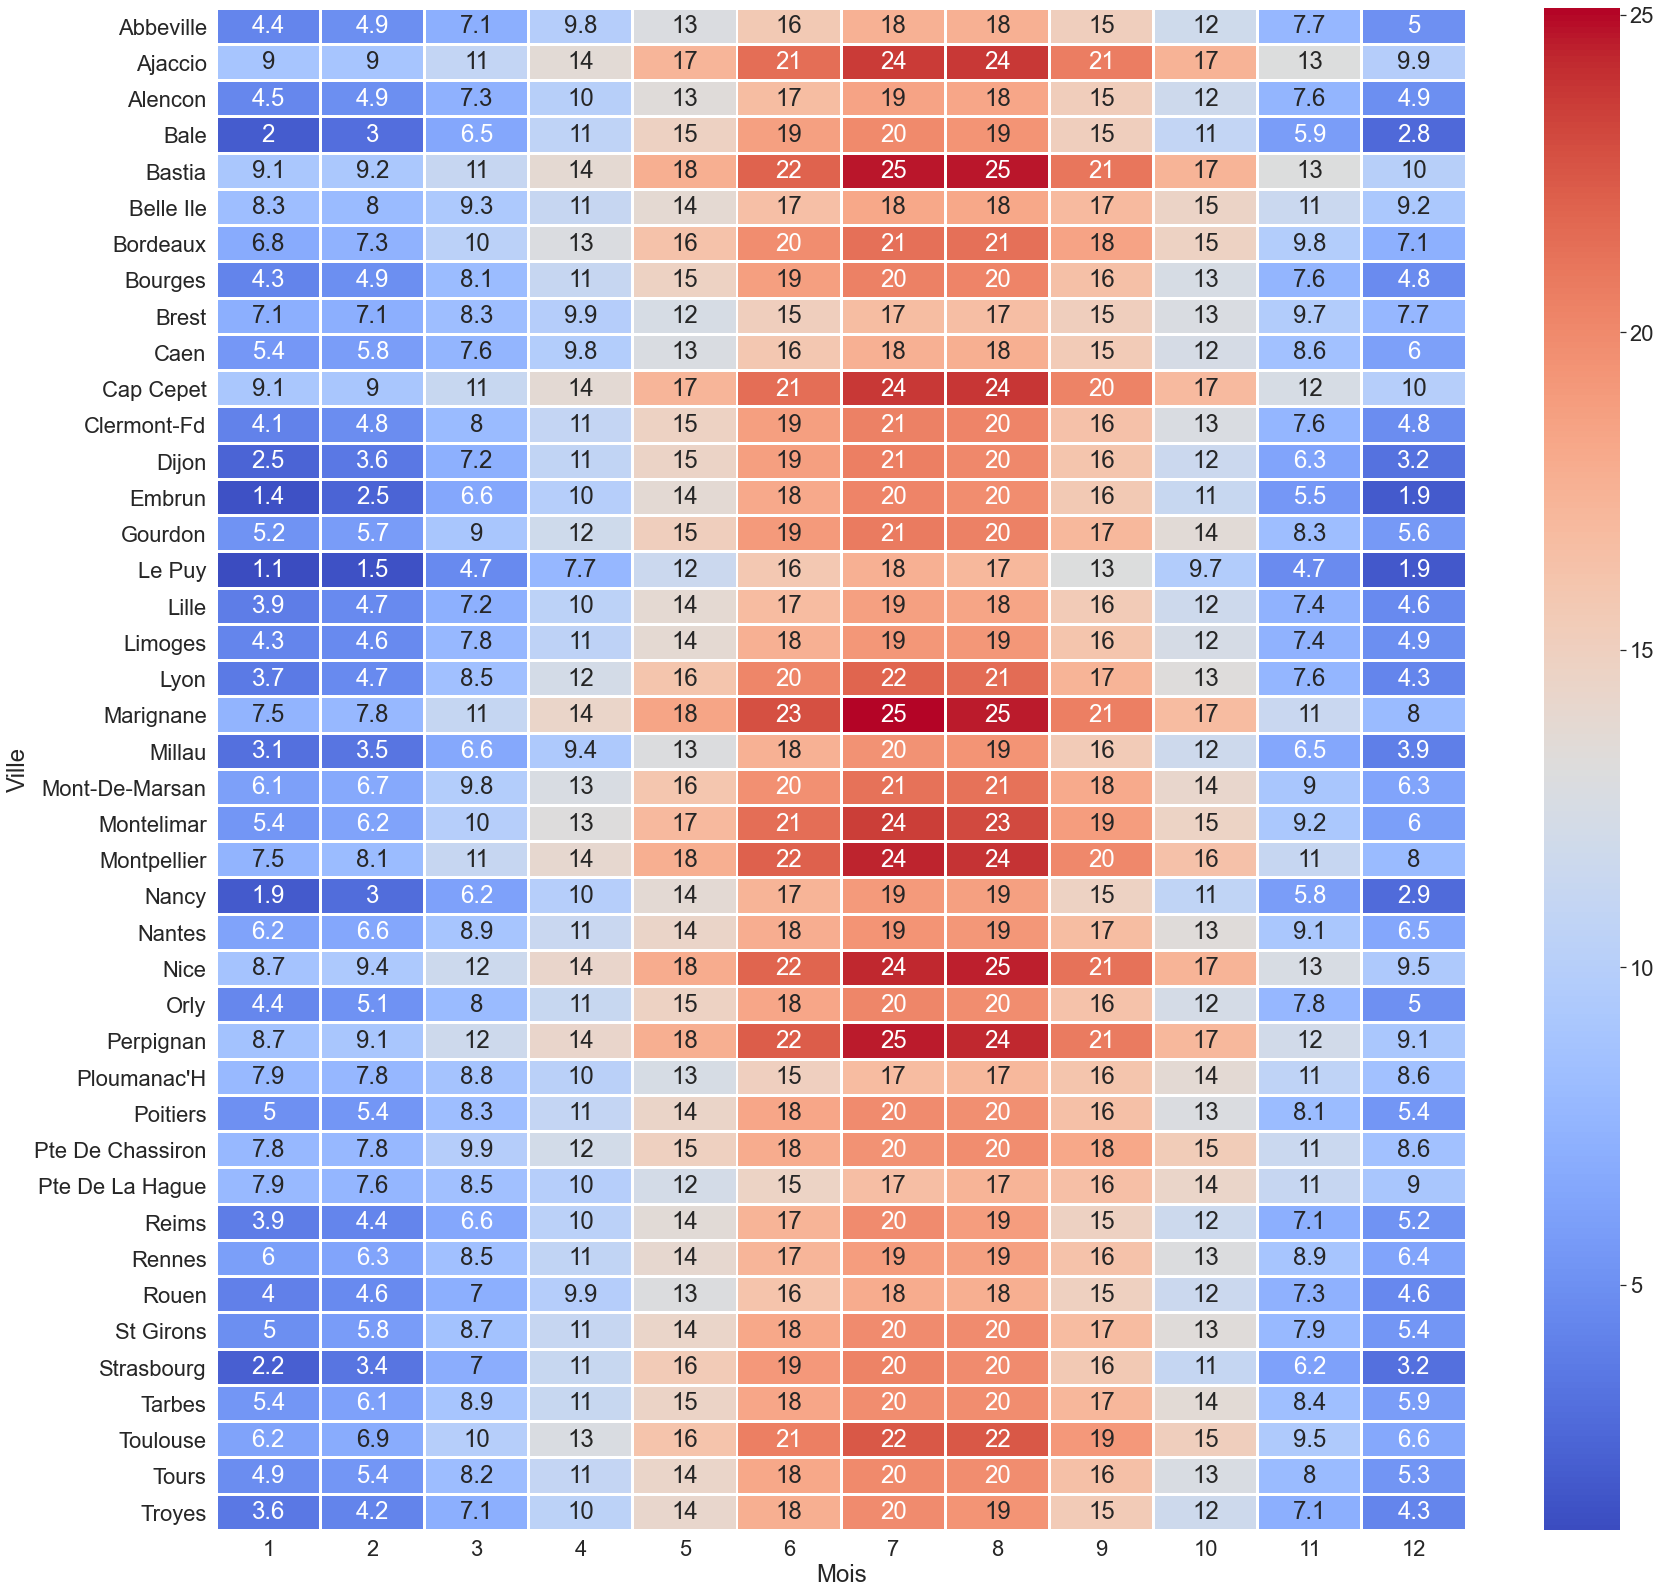

In [34]:
plt.figure(figsize=(28,28))
sns.heatmap(tabC,cmap='coolwarm',linewidths=2,linecolor='white', annot=True);

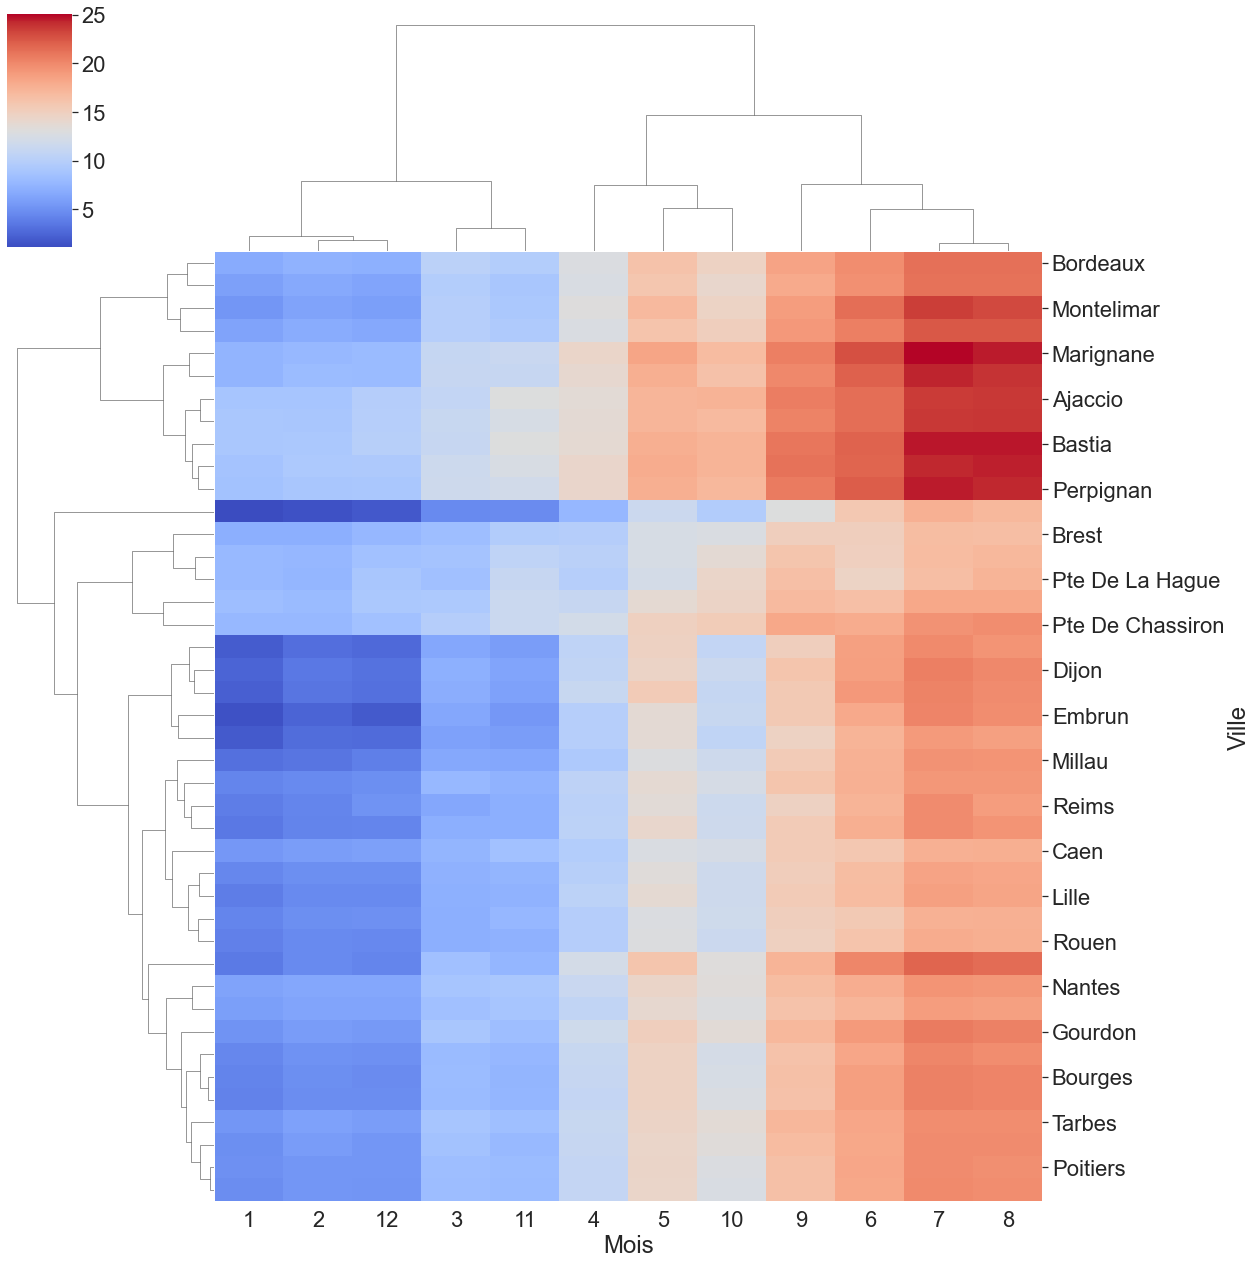

In [35]:
sns.clustermap(tabC,cmap='coolwarm',figsize=(18,18));

In [36]:
meteo = pd.read_csv('meteoCompleteFinal.csv')
meteo['Jour365'] = meteo.Mois.apply(lambda x : '%0*d' % (2, x))+meteo.Jour.apply(lambda x : '%0*d' % (2, x))
meteoAM = meteo[["Ville","Jour365","Température"]].groupby(["Ville","Jour365"])
meteoAM.agg(["mean"])
meteo = meteoAM.apply(lambda x: x) 
meteo.head()

Ville Jour365  Température
0  Abbeville    0101         2.89
1  Abbeville    0101         2.70
2  Abbeville    0101         2.89
3  Abbeville    0101         3.60
4  Abbeville    0101         4.39

In [37]:
tabC = meteo[meteo.Jour365 != '0229'].pivot_table(index='Ville',columns='Jour365',values="Température")
tabC

Jour365               0101      0102       0103      0104      0105      0106  \
Ville                                                                           
Abbeville         4.101850  4.633750   4.302487  4.482950  4.520600  4.551200   
Ajaccio           9.330500  9.780804   9.526212  9.402194  8.953700  9.298434   
Alencon           4.401566  4.757789   4.477100  4.412550  4.557500  4.524848   
Bale              2.143200  2.353650   2.275450  2.195500  2.446700  2.139800   
Bastia            9.122200  9.815550  10.351371  9.389600  9.208150  9.007828   
Belle Ile         8.811061  8.610979   8.763216  8.561150  8.418150  8.360503   
Bordeaux          7.121150  7.433950   7.079550  6.977550  6.656818  6.415000   
Bourges           4.479600  4.675950   4.370800  4.263050  4.275000  4.533850   
Brest             7.870670  7.209798   7.453182  7.034500  7.190050  7.091700   
Caen              5.330102  5.617900   5.435550  5.532261  5.643869  5.416683   
Cap Cepet         9.482900  9.732100   9.595436  9.829372  8.751827  9.163550   
Clermont-Fd       4.611162  4.700850   4.281414  4.721759  4.509598  4.132296   
Dijon             3.292100  3.192550   2.783250  2.913200  2.819500  2.854874   
Embrun            1.490350  1.460000   1.009250  1.063351  0.956786  1.441566   
Gourdon           5.355361  5.586970   5.271600  5.323250  5.061055  4.532923   
Le Puy            2.029500  2.026500   1.604550  1.716308  1.310404  1.209697   
Lille             3.732100  4.054422   3.649100  4.046200  3.981100  3.957186   
Limoges           4.630900  4.583150   4.294874  4.363367  4.028650  4.161515   
Lyon              4.225226  4.343636   3.911150  4.267450  3.900050  3.873909   
Marignane         7.852600  8.655879   7.642150  7.661600  6.749050  7.202850   
Millau            3.547750  3.804550   3.190561  3.149040  2.948450  2.967107   
Mont-De-Marsan    6.400863  6.963100   6.365900  6.421357  5.856150  5.653150   
Montelimar        5.939100  6.000000   5.549091  5.833700  5.147839  5.525250   
Montpellier       7.969400  8.168333   7.792437  7.981276  7.174650  7.311212   
Nancy             2.146515  2.131717   1.973600  1.892030  1.850508  1.875253   
Nantes            6.243750  6.614700   6.386050  6.329000  6.158600  5.964848   
Nice              8.628200  9.152700   8.962600  8.754646  8.463200  8.728744   
Orly              4.334550  4.718450   4.631300  4.460503  4.531550  4.540202   
Perpignan         8.990150  9.306350   9.796600  9.664000  9.159050  8.843417   
Ploumanac'H       8.127742  8.121551   8.107459  7.979836  7.854270  8.007833   
Poitiers          5.269497  5.379646   5.273384  5.028550  4.970900  4.905350   
Pte De Chassiron  7.907600  8.418985   8.209095  7.796250  7.648030  7.397216   
Pte De La Hague   8.245285  8.393906   8.258385  8.077188  8.225104  7.943842   
Reims             3.442188  5.139063   6.512500  6.114063  4.512500  3.818750   
Rennes            6.141650  6.287450   6.124300  6.213819  6.162312  5.743266   
Rouen             3.953782  4.372677   4.041692  4.100471  4.435885  4.307789   
St Girons         5.049100  5.595377   5.309200  5.730000  5.260101  4.581650   
Strasbourg        2.469548  2.540450   2.451650  2.529095  2.688400  2.087035   
Tarbes            5.580250  5.990000   5.433600  6.247600  5.622576  5.077727   
Toulouse          6.350100  6.856600   6.687576  6.466050  5.923150  5.600909   
Tours             4.993150  5.272010   5.211608  4.766600  4.941100  4.889196   
Troyes            3.678900  4.024350   3.845578  3.733266  3.729800  3.413116   

Jour365               0107      0108      0109      0110  ...       1222  \
Ville                                                     ...              
Abbeville         5.187000  5.235250  4.971800  4.397550  ...   5.874115   
Ajaccio           9.655000  9.702755  9.437739  9.501910  ...  10.056354   
Alencon           4.713300  5.208150  5.061050  4.822600  ...   5.736146   
Bale              2.704673  2.744350  2.820754  2.39370

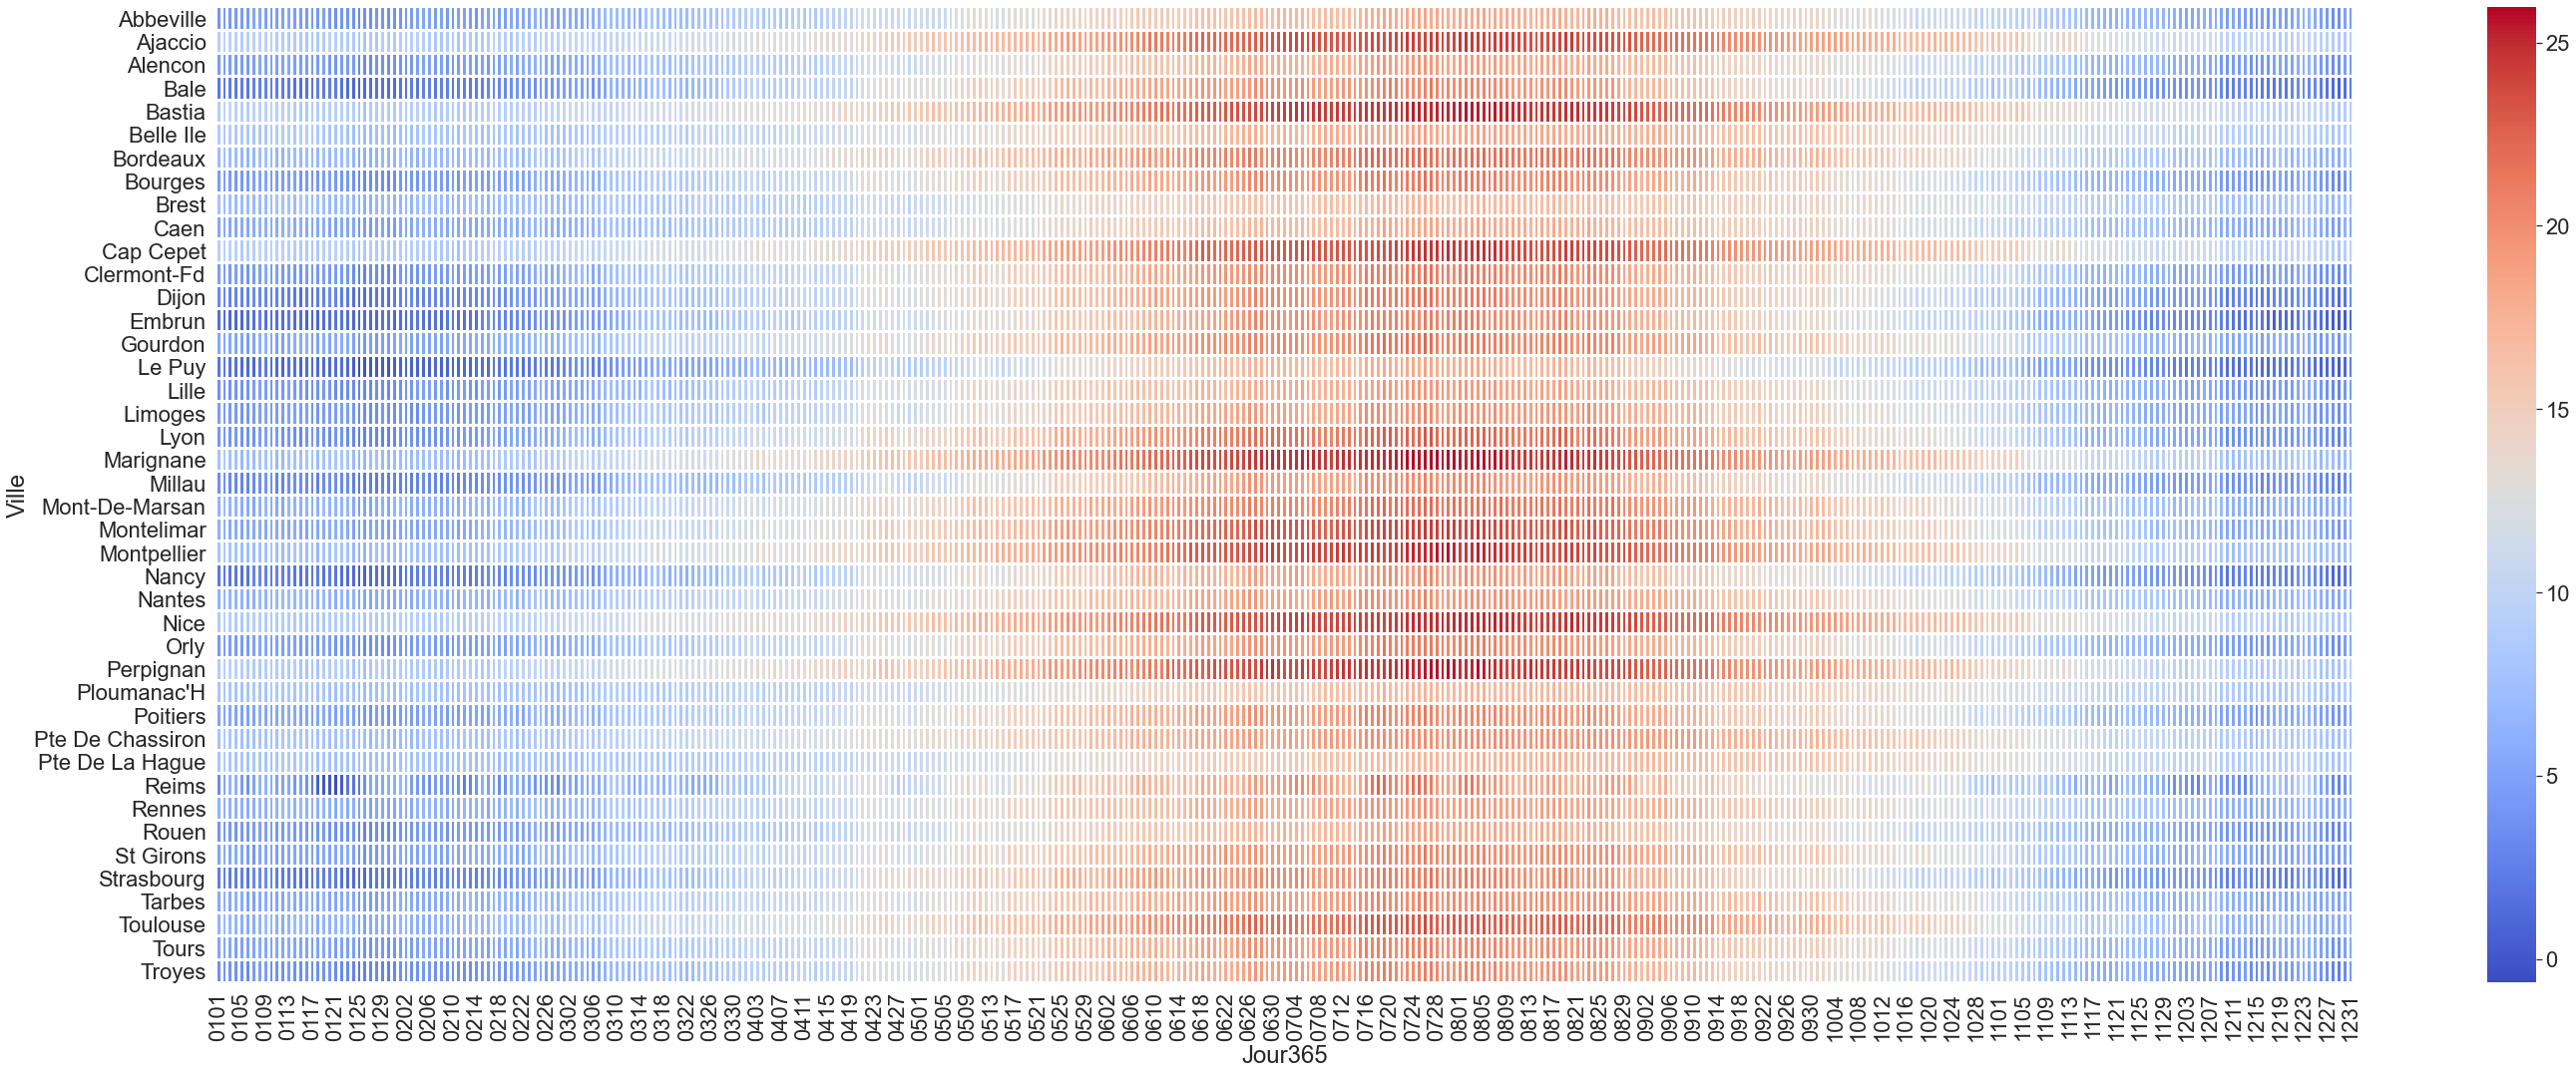

In [38]:
plt.figure(figsize=(48,18))
sns.heatmap(tabC,cmap='coolwarm',linewidths=2,linecolor='white');

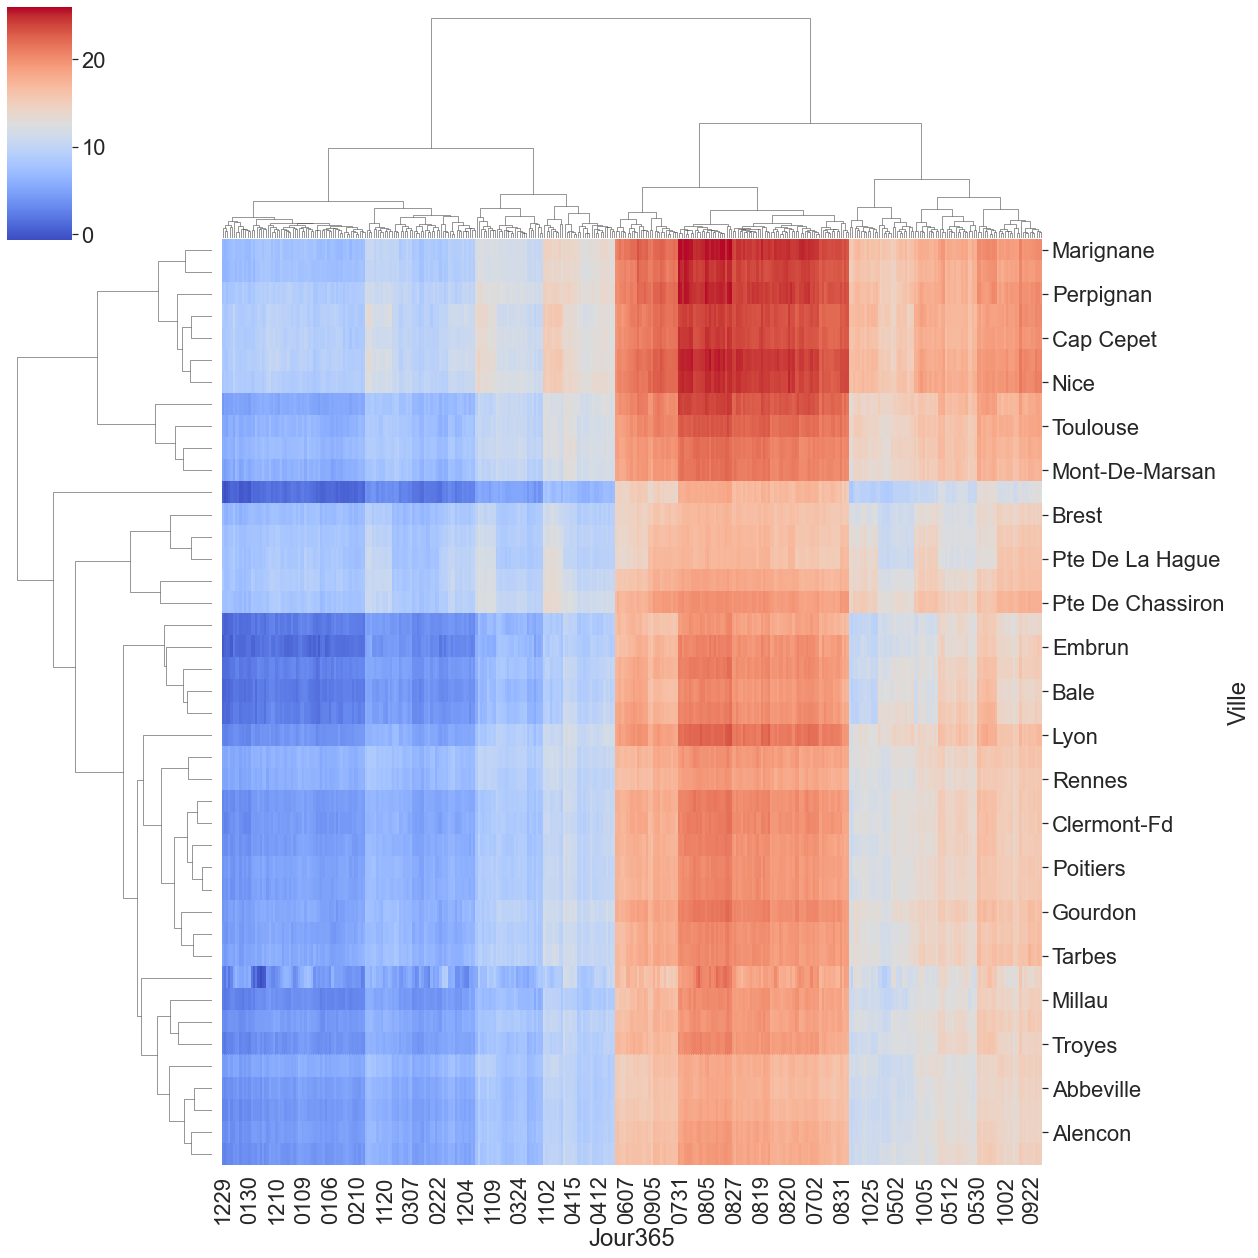

In [39]:
sns.clustermap(tabC,cmap='coolwarm',figsize=(18,18));